## ExpectedFoot

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=11T2jM0f9zc_rDxKuhXmZ6TlSPfGU4iyO" width=400px>
</p>

ExpectedFoot es un proyecto mediante el cual mediante datos recogidos de jugadores de las 5 grandes ligas (Liga Española, Liga Inglesa, Liga Alemana, Liga Italiana y Liga Francesa) provenientes de la web [fbref.com](https://fbref.com/en/) se encargará de predecir en base a unas estadísticas introducidas cuántos Expected Goals ('xG') que será capaz de anotar un futbolista.

Los Expected Goals ('xG') son un medida de la llamada "estadística avanzada" que se utiliza en fútbol para cuantificar la probabilidad de que un disparo a portería se convierta en gol. Un jugador con un número elevado de xG será un jugador muy a tener en cuenta, por ejemplo, Erling Haaland, uno de los mejores futbolistas y anotadores de la actualidad, tiene en la temporada actual 15 xG y 1.03 xG cada 90 minutos.

## Autores

- [Alberto Moreno González](https://github.com/albertomorenogonzalez)

- [Ciro León Espinosa Avilés](https://github.com/CiroEspinosa)

- [Francisco López González](https://github.com/franciscolg13)

## Obtención de Datos

Los datos utilizados en este proyecto son provenientes de [fbref.com](https://fbref.com/en/), una web de estadísticas históricas de clubes y jugadores de fútbol. Seleccionamos en concreto datos de las cinco ligas más importantes del mundo:

- [LaLiga](https://www.laliga.com/es-GB) - Liga Española

- [Premier League](https://www.premierleague.com/) - Liga Inglesa

- [Bundesliga](https://www.bundesliga.com/es/bundesliga) - Liga Alemana

- [Serie A](https://www.legaseriea.it/en) - Liga Italiana

- [Ligue 1](https://www.ligue1.com/) - Liga Francesa

Para obtener estos datos usaremos la técnica de web scrapping, que es es una técnica de extracción de datos que consiste en recopilar información de páginas web de forma automatizada. Utilizando programas o scripts, se analiza el contenido de las páginas para extraer datos específicos, como texto, imágenes, enlaces o cualquier otro tipo de información estructurada. Esta técnica es comúnmente utilizada para recopilar datos de múltiples fuentes en grandes cantidades para su posterior análisis, investigación o uso en aplicaciones.

En nuestro caso la utilizaremos para recopilar datos estadísticos de futbolistas desde el año 2015 hasta el año 2024 en la presente temporada.

### Scrapping

#### Análisis de la Estructura de los Datos en la Web

Primero vamos a analizar como está distribuida la página web.

![](https://drive.google.com/uc?export=view&id=1_k5Rd6DpTMtL3xe5r92X4-eK9DCz56kA)

<sub>Página de inicio</sub>

Busquemos una liga para ver como se distribuyen los datos que queremos extraer, por ejemplo, la liga española:

![](https://drive.google.com/uc?export=view&id=1Jmdy7BXCj_Nph1_QgPGR9_zX6LPpVhhq)

En el apartado destacado **Squad & Player Stats**, seleccionamos *Standard Stats*. En este apartado de cada liga es donde se encuentran los datos que queremos obtener.

![](https://drive.google.com/uc?export=view&id=1pXfMzfVMq7tu_NXgtp_6pUplKuOETPop)

Lo primero que vemos son datos generales de los equipos que no necesitamos, más abajo está lo realmente queremos obtener.

![](https://drive.google.com/uc?export=view&id=1avOvHg_f3U2p71nUoqEXEzUmxPYxaz5f)

Cada fila de esta tabla son datos de jugadores muy valiosos para el entrenamiento de nuestro modelo. Veamos como se organizan en el html.

![](https://drive.google.com/uc?export=view&id=1rVyx8zdEnFlnpYb44-ClzwRpZEiFtPYi)

Cada jugador en el html está representado por una etiqueta `tr` con todas los valores del jugador en etiquetas `td` bastante bien estructuradas para su posterior acceso. Cada etiqueta de estas esta diferenciada por el valor de un atributo que contienen llamado `data-stat`, que usaremos posteriormente para obetener los datos. Con esto en mente dirijámonos a obtener datos, no solo de este apartado de ejemplo, sino de todas aquellas temporadas de las 5 grandes ligas desde la 2010/2011 a la actual, ya que todas se organizan de la misma manera.

#### Desarrollo del Scrapping

Para obtener todos los datos necesarios para crear un modelo eficiente lo hemos hecho de la siguiente manera:

<mark><sub>**Nota**: El siguiente código no está disponible para ejecutarlo ya que el web scrapping no es una práctica que acepten la mayoría de las páginas web, sobretodo si es un número elevado de páginas como es nuestro caso. La extracción de los datos se ha hecho primero antes de insertar el código en el colab. El código se ha ejecutado cinco veces respectivamente cambiando cada liga de forma manual. La ejecución del código se ha realizado de forma cautelar y segmentada para evitar el bloqueo de la IP por parte de la web. Esta práctica se ha realizado con fines educativos, no pretendemos lucrarnos de ello.</sub></mark>

```python
# Importamos las librerías necesarias para realizar el scrapping
import re
import pandas as pd
import numpy as np
from requests import get
from bs4 import BeautifulSoup
```

```python
# La siguiente función extrará la temporada correspondiente al link actual del
# que se está scrappeando información.
def extract_season(url):
  """
  La siguiente función se encargará de extraer la temporada a la que hace
  referencia al link que se pasa como parámetro.
  """
  season_pattern = re.compile(r'https://fbref\.com/en/comps/20/(\d{4}-\d{4})/stats/\d{4}-\d{4}-(\w+)-Stats')
  matched = season_pattern.search(url)
  if matched:
      return matched.group(1)
  else:
      return None
```

```python
# Generamos una batería de URLs para comprobar si existen primero para scrappear
# La liga se cambia de forma manual, tenemos como ejemplo la Bundesliga alemana
base_url = "https://fbref.com/en/comps/20/"
urls = [base_url + f"{year}-{year+1}/stats/{year}-{year+1}-Bundesliga-Stats" for year in range(2015, 2024)]
```

```python
# Creamos un DataFrame vacío para ir almacenando los datos
combined_df = pd.DataFrame()
```

Antes de obtener los datos de cada URL tenemos que tener en cuenta una cosa. El siguiente código será de ejemplo:

```python
from requests import get

url = "https://fbref.com/en/comps/12/stats/La-Liga-Stats"

answer = get(url)

if answer.status_code == 200:
    print(answer.text)

```

La sálida de este código llegada a cierto punto será la siguiente:

![](https://drive.google.com/uc?export=view&id=1STIW3glEYDtDMi0S8j_8DMe53fDm-3Eb)

Después de realizar pruebas en las que el scrapping convencional presentaba falta de datos y muestra de la información solo hasta cierto punto, revisando el output generado de forma manual podemos observar que a partir de ciento punto en la página, la información de los jugadores está comentada, lo que hace que *BeautifulSoup* no pueda acceder a la misma. Es por eso que una vez obtenida la respuesta, simplemente eliminado las aperturas y cierres de comentarios (`<!--`, `-->`) podremos acceder a la información fácilmente. Continuemos con el código utilizado para scrappear.

```python
# Obtenemos los datos de cada URL
for url in urls:
  # Obtenemos la respuesta de una url en cada iteración
  answer = get(url)

  # Si se establecido conexión (debería ocurrir en cualquier caso)
  # obtendremos el texto de la respuesta que corresponde al
  # código html de la web. Retiramos las aperturas y cierres de
  # comentarios para poder acceder a la información fácilmente
  if answer.status_code == 200:
    answer = answer.text
    answer = answer.replace("<!--", "")
    answer = answer.replace("-->", "")

    # Parseamos el archivo con BeautifulSoup para tratarlo a continuación
    html_soup = BeautifulSoup(answer, 'html.parser')

    # Obtenemos todas las etiquetas tr, las cuáles la mayoría son datos de futbolistas
    players_html = html_soup.find_all('tr')

    # Generamos un array para atributo del jugador y añadir ahí todos los datos
    # de cada tipo para alojarlo posteriormente en el DataFrame
    # La explicación detallada de qué significan estos datos se realizará en
    # apartados posteriores.
    player = []
    team = []
    games = []
    games_starts = []
    minutes = []
    minutes_90s = []
    goals = []
    assists = []
    goals_assists = []
    goals_pens = []
    pens_made = []
    pens_att = []
    cards_yellow = []
    cards_red = []
    xg = []
    npxg = []
    xg_assist = []
    npxg_xg_assist = []
    progressive_carries = []
    progressive_passes = []
    goals_per90 = []
    assists_per90 = []
    goals_assists_per90 = []
    goals_pens_per90 = []
    goals_assists_pens_per90 = []
    xg_per90 = []
    xg_assist_per90 = []
    xg_xg_assist_per90 = []
    npxg_per90 = []
    npxg_xg_assist_per90 = []

    # Recorremos la variable que alberga las etiquetas tr, dentro de ella,
    # serán jugadores aquellos cuya primera etiqueta 'td' sea como la siguiente:
    # ''td', {'class': 'left', 'data-stat': 'player'}'. Una vez obtenida una
    # etiqueta con estos valores obtenemos cada td con atributo 'data-stat'.
    # Podemos ver esta distribución de los datos en el apartado previo donde
    # estuvimos analizándolo. Cada atributo conseguido lo guardamos en su array
    # correspondiente. Si el dato está vacío rellenamos la posicion correspondiente
    # con ''.
    for player in players_html:
      player_e = player.find('td', {'class': 'left', 'data-stat': 'player'})
      if player_e:
        player.append(player_e.text)
        team.append(player.find('td', {'class': 'left', 'data-stat': 'team'}).text)
        games.append(player.find('td', {'class': 'right group_start', 'data-stat': 'games'}).text)
        games_starts.append(player.find('td', {'data-stat': 'games_starts'}).text)
        minutes.append(player.find('td', {'data-stat': 'minutes'}).text)
        minutes_90s.append(player.find('td', {'data-stat': 'minutes_90s'}).text)
        goals.append(player.find('td', {'data-stat': 'goals'}).text if player.find('td', {'data-stat': 'goals'}) else '')
        assists.append(player.find('td', {'data-stat': 'assists'}).text if player.find('td', {'data-stat': 'assists'}) else '')
        goals_assists.append(player.find('td', {'data-stat': 'goals_assists'}).text if player.find('td', {'data-stat': 'goals_assists'}) else '')
        goals_pens.append(player.find('td', {'data-stat': 'goals_pens'}).text if player.find('td', {'data-stat': 'goals_pens'}) else '')
        pens_made.append(player.find('td', {'data-stat': 'pens_made'}).text if player.find('td', {'data-stat': 'pens_made'}) else '')
        pens_att.append(player.find('td', {'data-stat': 'pens_att'}).text if player.find('td', {'data-stat': 'pens_att'}) else '')
        cards_yellow.append(player.find('td', {'data-stat': 'cards_yellow'}).text if player.find('td', {'data-stat': 'cards_yellow'}) else '')
        cards_red.append(player.find('td', {'data-stat': 'cards_red'}).text if player.find('td', {'data-stat': 'cards_red'}) else '')
        xg.append(player.find('td', {'data-stat': 'xg'}).text if player.find('td', {'data-stat': 'xg'}) else '')
        npxg.append(player.find('td', {'data-stat': 'npxg'}).text if player.find('td', {'data-stat': 'npxg'}) else '')
        xg_assist.append(player.find('td', {'data-stat': 'xg_assist'}).text if player.find('td', {'data-stat': 'xg_assist'}) else '')
        npxg_xg_assist.append(player.find('td', {'data-stat': 'npxg_xg_assist'}).text if player.find('td', {'data-stat': 'npxg_xg_assist'}) else '')
        progressive_carries.append(player.find('td', {'data-stat': 'progressive_carries'}).text if player.find('td', {'data-stat': 'progressive_carries'}) else '')
        progressive_passes.append(player.find('td', {'data-stat': 'progressive_passes'}).text if player.find('td', {'data-stat': 'progressive_passes'}) else '')
        goals_per90.append(player.find('td', {'data-stat': 'goals_per90'}).text if player.find('td', {'data-stat': 'goals_per90'}) else '')
        assists_per90.append(player.find('td', {'data-stat': 'assists_per90'}).text if player.find('td', {'data-stat': 'assists_per90'}) else '')
        goals_assists_per90.append(player.find('td', {'data-stat': 'goals_assists_per90'}).text if player.find('td', {'data-stat': 'goals_assists_per90'}) else '')
        goals_pens_per90.append(player.find('td', {'data-stat': 'goals_pens_per90'}).text if player.find('td', {'data-stat': 'goals_pens_per90'}) else '')
        goals_assists_pens_per90.append(player.find('td', {'data-stat': 'goals_assists_pens_per90'}).text if player.find('td', {'data-stat': 'goals_assists_pens_per90'}) else '')
        xg_per90.append(player.find('td', {'data-stat': 'xg_per90'}).text if player.find('td', {'data-stat': 'xg_per90'}) else '')
        xg_assist_per90.append(player.find('td', {'data-stat': 'xg_assist_per90'}).text if player.find('td', {'data-stat': 'xg_assist_per90'}) else '')
        xg_xg_assist_per90.append(player.find('td', {'data-stat': 'xg_xg_assist_per90'}).text if player.find('td', {'data-stat': 'xg_xg_assist_per90'}) else '')
        npxg_per90.append(player.find('td', {'data-stat': 'npxg_per90'}).text if player.find('td', {'data-stat': 'npxg_per90'}) else '')
        npxg_xg_assist_per90.append(player.find('td', {'data-stat': 'npxg_xg_assist_per90'}).text if player.find('td', {'data-stat': 'npxg_xg_assist_per90'}) else '')


        # LIMPIEZA PREVIA DE LOS DATOS ANTES DE GUARDARLOS EN CSV

        # La estadística de minutos registra los valores que alacanzan los
        # miles con comas, lo que da problemas a la hora de guardarlos en
        # DataFrame. Retiramos las comas de cada valor que las contenga
        for i in range(len(minutes)):
          minutes[i] = minutes[i].replace(",", "")

        # Guardamos todos los arrays en un array
        stats = [player, team, games, games_starts, minutes, minutes_90s,
                  goals, assists, goals_assists, goals_pens, pens_made,
                  pens_att, cards_yellow, cards_red, xg, npxg, xg_assist,
                  npxg_xg_assist, progressive_carries, progressive_passes,
                  goals_per90, assists_per90, goals_assists_per90,
                  goals_pens_per90, goals_assists_pens_per90, xg_per90,
                  xg_assist_per90, xg_xg_assist_per90, npxg_per90,
                  npxg_xg_assist_per90]

        # Buscamos los valores que han quedado como '' y los transformamos a '0'
        for arr in stats:
          for i in range(len(arr)):
            if arr[i] == '':
                arr[i] = '0'

        # Creamos un DataFrame con los datos en los que los guardamos con los
        # tipos de datos correspondientes. Si no se guardarían todos como
        # object
        data = {
            'player': player,
            # Sacamos la temporada de la URL
            'season' : extract_season(url),
            'team': team,
            'games': np.array(games).astype(int),
            'games_starts': np.array(games_starts).astype(int),
            'minutes': np.array(minutes).astype(int),
            'minutes_90s': np.array(minutes_90s).astype(np.float32),
            'goals': np.array(goals).astype(int),
            'assists': np.array(assists).astype(int),
            'goals_assists': np.array(goals_assists).astype(int),
            'goals_pens': np.array(goals_pens).astype(int),
            'pens_made': np.array(pens_made).astype(int),
            'pens_att': np.array(pens_att).astype(int),
            'cards_yellow': np.array(cards_yellow).astype(int),
            'cards_red': np.array(cards_red).astype(int),
            'xg': np.array(xg).astype(np.float32),
            'npxg': np.array(npxg).astype(np.float32),
            'xg_assist': np.array(xg_assist).astype(np.float32),
            'npxg_xg_assist': np.array(npxg_xg_assist).astype(np.float32),
            'progressive_carries': np.array(progressive_carries).astype(int),
            'progressive_passes': np.array(progressive_passes).astype(int),
            'goals_per90': np.array(goals_per90).astype(np.float32),
            'assists_per90': np.array(assists_per90).astype(np.float32),
            'goals_assists_per90': np.array(goals_assists_per90).astype(np.float32),
            'goals_pens_per90': np.array(goals_pens_per90).astype(np.float32),
            'goals_assists_pens_per90': np.array(goals_assists_pens_per90).astype(np.float32),
            'xg_per90': np.array(xg_per90).astype(np.float32),
            'xg_assist_per90': np.array(xg_assist_per90).astype(np.float32),
            'xg_xg_assist_per90': np.array(xg_xg_assist_per90).astype(np.float32),
            'npxg_per90': np.array(npxg_per90).astype(np.float32),
            'npxg_xg_assist_per90': np.array(npxg_xg_assist_per90).astype(np.float32),
        }

        df = pd.DataFrame(data)

        # Concatenamos los datos de los jugadores en la temporada en el
        # DataFrame que alberga todos los datos.
        combined_df = pd.concat([combined_df, df], ignore_index=True)


# Guardamos el DataFrame combinado en un archivo CSV
combined_df.to_csv("bundesliga_players_combined.csv", index=False)

```

### Obtención del DataFrame Unificado con el que vamos a Trabajar

Una vez obtenido los datos scrappeados para las cinco grandes ligas, han sido alojados en formato `csv` en el repositorio de GitHub del proyecto para su uso en este cuaderno de Google Colab. Para ello clonaremos el repositorio en los archivos de la máquina utilizada para ejecutar el cuaderno.

In [1]:
# Gracias a la librería os, podemos ver si el repositorio está descargado
# o no dentro del entorno de ejecución del colab. Si no está descargado,
# lo descargará, pero si está descargado, mostrará un mensaje que lo confirma
import os

if not os.path.exists('ExpectedFoot'):
  !git clone https://github.com/albertomorenogonzalez/ExpectedFoot.git
else:
  print("El directorio ya está descargado.")

Cloning into 'ExpectedFoot'...
remote: Enumerating objects: 522, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 522 (delta 30), reused 3 (delta 3), pack-reused 459
Receiving objects: 100% (522/522), 4.99 MiB | 14.31 MiB/s, done.
Resolving deltas: 100% (226/226), done.


Guardamos los datos de cada liga en un DataFrame distinto.

In [2]:
import pandas as pd

bundesliga = pd.read_csv("/content/ExpectedFoot/scrap/bundesliga_players_combined.csv")
laliga = pd.read_csv("/content/ExpectedFoot/scrap/laliga_players_combined.csv")
ligue_1 = pd.read_csv("/content/ExpectedFoot/scrap/liguea_players_combined.csv")
premier_league = pd.read_csv("/content/ExpectedFoot/scrap/premierleague_players_combined.csv")
serie_a = pd.read_csv("/content/ExpectedFoot/scrap/seriea_players_combined.csv")

Unimos los cinco DataFrames, obteniendo todos los datos necesarios en uno solo para poder tratar los datos a partir de él.

In [3]:
players = pd.concat([bundesliga, laliga, ligue_1, premier_league, serie_a], ignore_index=True)

players

,player,season,team,games,games_starts,minutes,minutes_90s,goals,assists,goals_assists,...,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90
0,David Abraham,2015-2016,Eint Frankfurt,31,28,2547,28.3,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,René Adler,2015-2016,Hamburger SV,24,24,2071,23.0,0,1,1,...,0.00,0.04,0.04,0.00,0.04,0.00,0.00,0.00,0.00,0.00
2,Stefan Aigner,2015-2016,Eint Frankfurt,31,27,2394,26.6,3,3,6,...,0.11,0.11,0.23,0.11,0.23,0.00,0.00,0.00,0.00,0.00
3,Albian Ajeti,2015-2016,Augsburg,1,0,37,0.4,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,David Alaba,2015-2016,Bayern Munich,30,27,2492,27.7,2,0,2,...,0.07,0.00,0.07,0.07,0.07,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23705,Nadir Zortea,2023-2024,Atalanta,5,0,149,1.7,1,0,1,...,0.60,0.00,0.60,0.60,0.60,0.05,0.16,0.21,0.05,0.21
23706,Szymon Żurkowski,2023-2024,Empoli,4,3,284,3.2,4,0,4,...,1.27,0.00,1.27,1.27,1.27,0.17,0.02,0.18,0.17,0.18
23707,Milan Đurić,2023-2024,Hellas Verona,20,13,1204,13.4,5,1,6,...,0.37,0.07,0.45,0.30,0.37,0.34,0.09,0.43,0.16,0.25
23708,Milan Đurić,2023-2024,Monza,2,1,124,1.4,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Descripción de los Datos

Ahora que tenemos todos los datos extraídos que necesitamos, vamos a describir en que consiste cada uno:

In [4]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23710 entries, 0 to 23709
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player                    23710 non-null  object 
 1   season                    23710 non-null  object 
 2   team                      23710 non-null  object 
 3   games                     23710 non-null  int64  
 4   games_starts              23710 non-null  int64  
 5   minutes                   23710 non-null  int64  
 6   minutes_90s               23710 non-null  float64
 7   goals                     23710 non-null  int64  
 8   assists                   23710 non-null  int64  
 9   goals_assists             23710 non-null  int64  
 10  goals_pens                23710 non-null  int64  
 11  pens_made                 23710 non-null  int64  
 12  pens_att                  23710 non-null  int64  
 13  cards_yellow              23710 non-null  int64  
 14  cards_

 0. `player` -> Nombre del jugador.
 1. `season` -> Temporada en la que se han recogido los datos.
 2. `team` -> Equipo al que pertenece el jugador.
 3. `games` -> Número de partidos que ha jugado el jugador en la temporada.
 4. `games_starts` -> Número de partidos que el jugador ha jugado de titular.
 5. `minutes` -> Minutos que ha jugado el jugador durante la temporada.
 6. `minutes_90s` -> Minutos jugados divididos entre 90.
 7. `goals` -> Goles anotados por el jugador.
 8. `assists` -> Asistencias realizadas por el jugador.
 9. `goals_assist` -> Goles y asistencias sumadas.
 10. `goals_pens` -> Goles que no han sido lanzamientos de penalti.
 11. `pens_made` -> Goles anotados de lanzamiento de penalti por el jugador.
 12. `pens_att` -> Lanzamientos de penalti intentados por el jugador.
 13. `cards_yellow` -> Tarjetas amarillas que ha visto el jugador.
 14. `cards_red` -> Tarjetas rojas que ha visto el jugador.
 15. `xg` **-> Expected Goals**
 16. `npxg` -> Expected Goals sin contar los lanzamientos de penalti.
 17. `xg_assists` -> Asistencias esperadas.
 18. `npxg_xg_assist` -> Suma de `npxg` y `xg_assists`.
 19. `progressive_carries` -> Avances progresivos, intentos exitosos de avance hacia adelante por parte de un jugador en los últimos 10 metros de campo.
 20. `progressive_passes` -> Pases progresivos, aquellos pases que mueven hacia la línea de gol en los últimos 10 metros de campo.
 21. `goals_per90` -> Goles anotados por un jugador cada 90 minutos.
 22. `assist_per90` -> Asistencias realizadas por el jugador cada 90 minutos.
 23. `goals_assists_per90` -> Suma de goles y asistencias cada 90 minutos.
 24. `goals_pens_per90` -> Goles sin contar penaltis anotados por parte del jugador cada 90 minutos.
 25. `goals_assists_pens_per90` -> Suma de goles sin contar penaltis y asistencias cada 90 minutos.
 26. `xg_per90` -> Expected Goals cada 90 minutos.
 27. `xg_assist_per90` -> Asistencias esperadas cada 90 minutos.
 28. `xg_xg_assist_per90` -> Suma de Goles y Asistencias esperados cada 90 minutos.
 29. `npxg_per90` -> Expected Goals sin contar penaltis cada 90 minutos.
 30. `npxg_xg_assist_per90` -> Suma de `npxg` y `xg_assists` cada 90 minutos.

## Exploración y Visualización de los Datos

Ahora que tenemos los datos y sabemos en qué consisten, vamos a analizar como están distribuidos para hacer un cambio posterior si es necesario.

In [5]:
players.head()

,player,season,team,games,games_starts,minutes,minutes_90s,goals,assists,goals_assists,...,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90
0,David Abraham,2015-2016,Eint Frankfurt,31,28,2547,28.3,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1,René Adler,2015-2016,Hamburger SV,24,24,2071,23.0,0,1,1,...,0.00,0.04,0.04,0.00,0.04,0.0,0.0,0.0,0.0,0.0
2,Stefan Aigner,2015-2016,Eint Frankfurt,31,27,2394,26.6,3,3,6,...,0.11,0.11,0.23,0.11,0.23,0.0,0.0,0.0,0.0,0.0
3,Albian Ajeti,2015-2016,Augsburg,1,0,37,0.4,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
4,David Alaba,2015-2016,Bayern Munich,30,27,2492,27.7,2,0,2,...,0.07,0.00,0.07,0.07,0.07,0.0,0.0,0.0,0.0,0.0


In [6]:
players.tail()

,player,season,team,games,games_starts,minutes,minutes_90s,goals,assists,goals_assists,...,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90
23705,Nadir Zortea,2023-2024,Atalanta,5,0,149,1.7,1,0,1,...,0.60,0.00,0.60,0.60,0.60,0.05,0.16,0.21,0.05,0.21
23706,Szymon Żurkowski,2023-2024,Empoli,4,3,284,3.2,4,0,4,...,1.27,0.00,1.27,1.27,1.27,0.17,0.02,0.18,0.17,0.18
23707,Milan Đurić,2023-2024,Hellas Verona,20,13,1204,13.4,5,1,6,...,0.37,0.07,0.45,0.30,0.37,0.34,0.09,0.43,0.16,0.25
23708,Milan Đurić,2023-2024,Monza,2,1,124,1.4,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
23709,Mateusz Łęgowski,2023-2024,Salernitana,20,9,879,9.8,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.04,0.02,0.04


Si nos fijamos bien podemos ver el primer problema que existe con los datos ya en esta visualización previa de algunas filas, pero antes vamos a ver su distribución y formato.

In [7]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23710 entries, 0 to 23709
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player                    23710 non-null  object 
 1   season                    23710 non-null  object 
 2   team                      23710 non-null  object 
 3   games                     23710 non-null  int64  
 4   games_starts              23710 non-null  int64  
 5   minutes                   23710 non-null  int64  
 6   minutes_90s               23710 non-null  float64
 7   goals                     23710 non-null  int64  
 8   assists                   23710 non-null  int64  
 9   goals_assists             23710 non-null  int64  
 10  goals_pens                23710 non-null  int64  
 11  pens_made                 23710 non-null  int64  
 12  pens_att                  23710 non-null  int64  
 13  cards_yellow              23710 non-null  int64  
 14  cards_

Afortunadamente no tenemos valores nulos en nuestros datos (en este caso particular de fútbol, si una estadística no tiene valor este es igual a 0). Los únicos valores que no son númericos, ya sea `int` o `float` son: el nombre del jugador, la temporada y el equipo al que pertenece el futbolista, Estos datos en un principio no contarían para el entrenamiento, el nombre del jugador debería ser sustituido por un id numérico si se fuese a tener en cuenta. En las 14 temporadas de las que hemos obtenido registros hay una gran cantidad de equipos que será difícil de sustituir, además de que la calidad colectiva de un equipo no tiene por qué afectar a la calidad individual de un jugador, sea o no sea exitoso el club. La temporada tampoco parece ser relevante.

Los registros pertenecientes a la estadística avanzada (`npxg`,
`xg_assists`, `npxg_xg_assist`, `xg_per90`, `xg_assist_per90`, `xg_xg_assist_per90`, `npxg_per90`, `npxg_xg_assist_per90`) ya que son calculados a través del resto para ser visualizados al igual que `xg` que es el que nos interesa, no serán tenidos en cuenta a la hora de realizar el entrenamiento con total seguridad, independientemente de su correlación. La idea es realizar la predicción con datos convencionales. Para poder averiguar el resto de datos deberíamos hacer un modelo de IA para cada uno.

`xg` es el dato que queremos predecir. Veamos cuáles son los 10 jugadores en cualquier temporada que más alta tienen esta estadística.

In [8]:
best_players_xg = players.sort_values(by='xg', ascending=False)

top_10_players = best_players_xg.head(10).copy()

top_10_players

,player,season,team,games,games_starts,minutes,minutes_90s,goals,assists,goals_assists,...,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90
3196,Robert Lewandowski,2021-2022,Bayern Munich,34,34,2946,32.7,35,3,38,...,1.07,0.09,1.16,0.92,1.01,1.01,0.13,1.15,0.90,1.03
2695,Robert Lewandowski,2020-2021,Bayern Munich,29,28,2458,27.3,41,7,48,...,1.50,0.26,1.76,1.21,1.46,1.14,0.17,1.31,0.88,1.06
1721,Robert Lewandowski,2018-2019,Bayern Munich,33,33,2957,32.9,22,7,29,...,0.67,0.21,0.88,0.58,0.79,0.93,0.27,1.21,0.84,1.11
2189,Robert Lewandowski,2019-2020,Bayern Munich,31,31,2759,30.7,34,4,38,...,1.11,0.13,1.24,0.95,1.08,1.00,0.22,1.22,0.87,1.09
21164,Cristiano Ronaldo,2019-2020,Juventus,33,33,2917,32.4,31,5,36,...,0.96,0.15,1.11,0.59,0.74,0.88,0.20,1.08,0.57,0.76
17505,Erling Haaland,2022-2023,Manchester City,35,33,2769,30.8,36,8,44,...,1.17,0.26,1.43,0.94,1.20,0.92,0.17,1.09,0.75,0.92
10481,Kylian Mbappé,2018-2019,Paris S-G,29,24,2343,26.0,33,7,40,...,1.27,0.27,1.54,1.23,1.50,1.08,0.21,1.28,1.01,1.22
1251,Robert Lewandowski,2017-2018,Bayern Munich,30,24,2172,24.1,29,2,31,...,1.20,0.08,1.28,0.95,1.04,1.16,0.10,1.26,0.93,1.03
21781,Cristiano Ronaldo,2020-2021,Juventus,33,31,2802,31.1,29,2,31,...,0.93,0.06,1.00,0.74,0.80,0.89,0.12,1.01,0.69,0.81
20941,Ciro Immobile,2019-2020,Lazio,37,36,3170,35.2,36,9,45,...,1.02,0.26,1.28,0.62,0.88,0.77,0.18,0.95,0.44,0.61


También podemos ver estos datos en una gráfica:

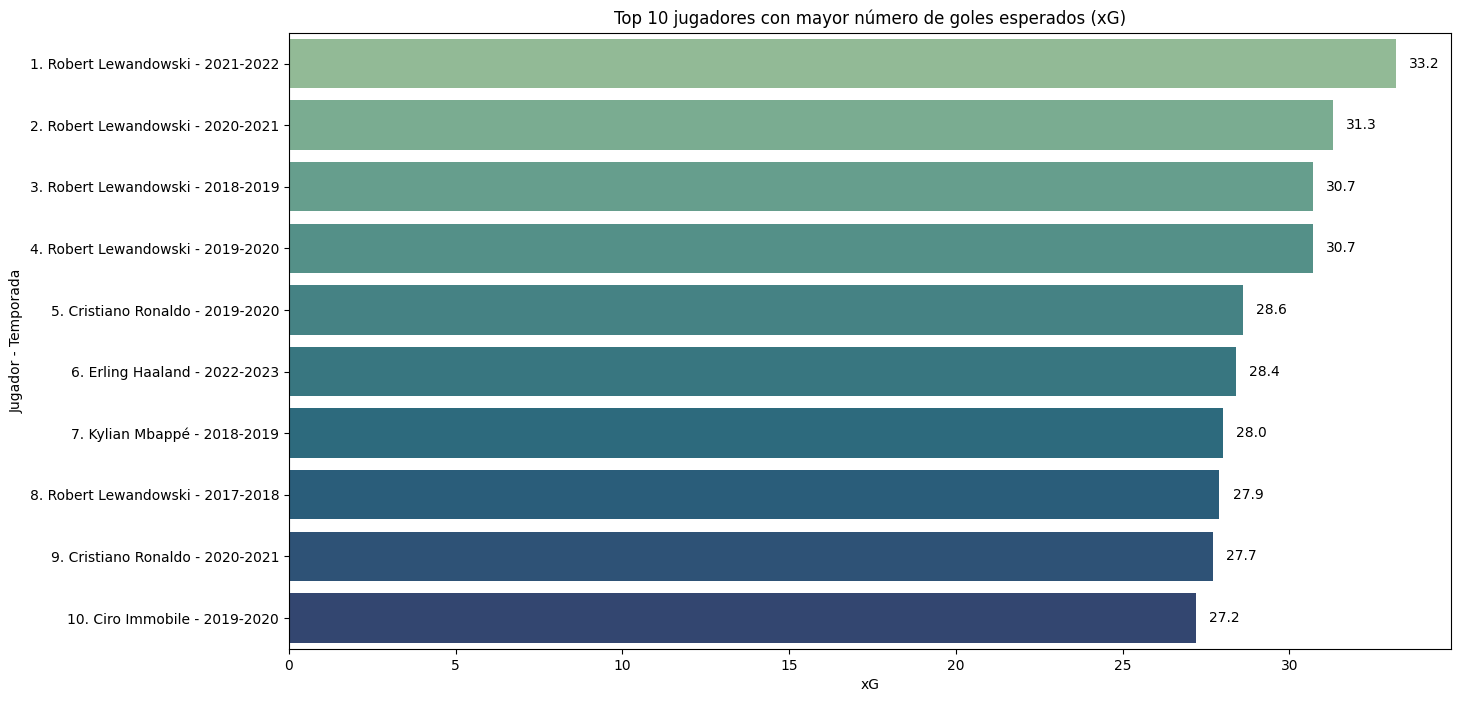

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_players['position'] = range(1, len(top_10_players) + 1)

top_10_players.loc[:, 'player-season'] = top_10_players.apply(lambda row: f"{row['position']}. {row['player']} - {row['season']}", axis=1)

plt.figure(figsize=(15, 8))
ax = sns.barplot(x='xg', y='player-season', hue='player-season', data=top_10_players, palette='crest', dodge=False)

for bar in ax.patches:
    width = bar.get_width()
    ax.text(width + 0.4, bar.get_y() + bar.get_height()/2, f'{width}', ha='left', va='center')

plt.xlabel('xG')
plt.ylabel('Jugador - Temporada')
plt.title('Top 10 jugadores con mayor número de goles esperados (xG)')
plt.show()

Estos son los jugadores con mayor número de xG en una temporada desde la temporada 2010-2011 hasta la actualidad. Todos ellos son delanteros, haciendo obvio que los jugadores de esta posición son los que van a tener valores más altos en esta estadística. Veamos cuantos goles ha marcado cada uno de estos jugadores.

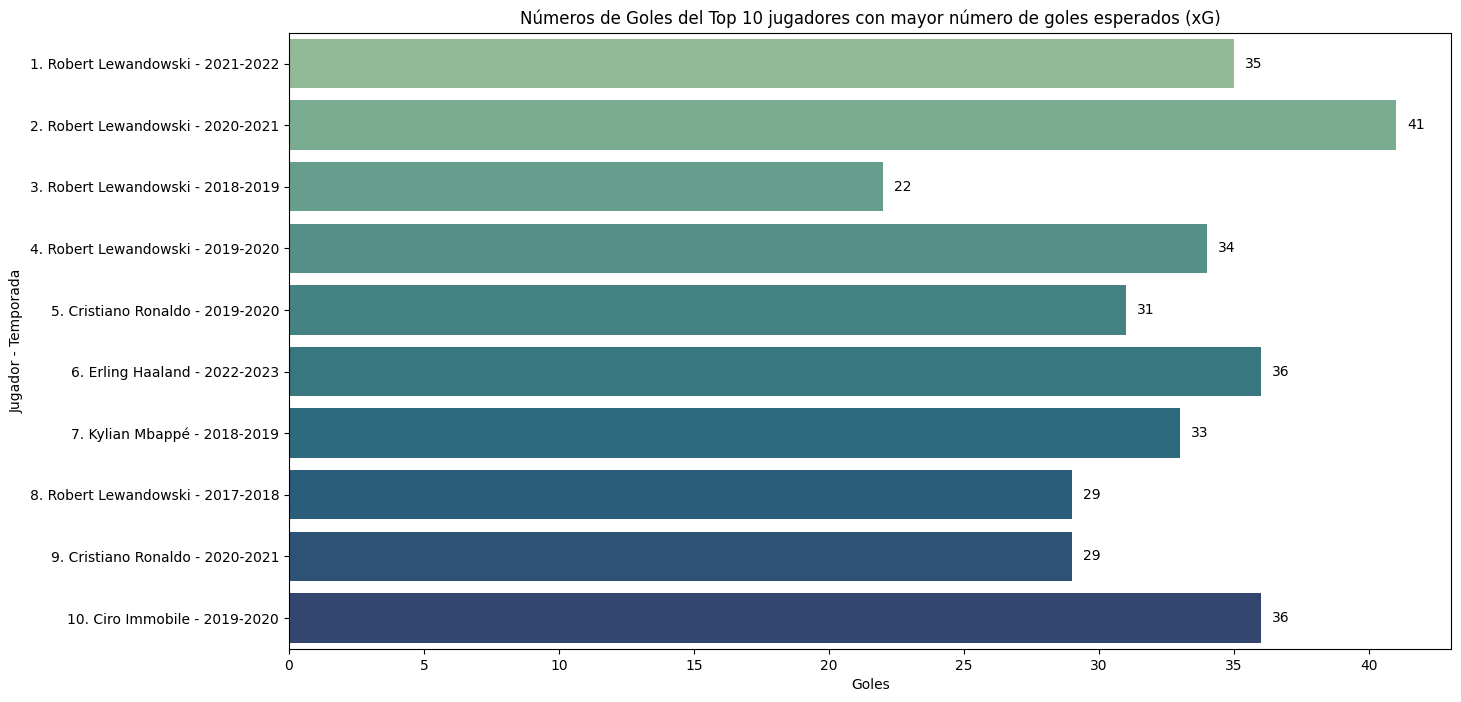

In [10]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='goals', y='player-season', hue='player-season', data=top_10_players, palette='crest', dodge=False)

for bar in ax.patches:
    width = bar.get_width()
    ax.text(width + 0.4, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='left', va='center')

plt.xlabel('Goles')
plt.ylabel('Jugador - Temporada')
plt.title('Números de Goles del Top 10 jugadores con mayor número de goles esperados (xG)')
plt.show()

Vemos como los xG no se corresponden con los goles anotados, los jugadores pueden superar esta espectativa o no alcanzarla. Al ser de los mejores delanteros del mundo se espera que la superen o al menos la igualen. Podemos observar como solo hay un caso en el que no se han superado espectativas y es Robert Lewandowski en la temporada 2018/2019, que es el tercer valor de xG más alto. ¿Qué ha podido influir en esto? Tenemos claro que la estadística que buscamos depende de muchos más factores que no son los goles. Veamos las estadísticas del jugador sin contar las avanzadas ni las de cada 90 minutos:

In [11]:
top_10_players[top_10_players['position'] == 3][["player", "season", "games", "games_starts", "minutes", "goals", "assists", "goals_assists", "goals_pens", "pens_made", "pens_att", "cards_yellow", "cards_red", "progressive_carries", "progressive_passes"]]

,player,season,games,games_starts,minutes,goals,assists,goals_assists,goals_pens,pens_made,pens_att,cards_yellow,cards_red,progressive_carries,progressive_passes
1721,Robert Lewandowski,2018-2019,33,33,2957,22,7,29,19,3,4,2,0,79,92


El jugador estuvo presente siendo titular en 33 de las 34 jornadas que componen la bundesliga, dio 7 asistencias y de los 22 goles que anotó, 3 fueron de penalti, habiendo tirado 4. El futbolista realizó 79 avances progresivos a portería y dio un total de 92 pases en los últimos 10 metros de campo. Comparemos ahora con el segundo valor de xG más alto (31.3) que también lo consigue Robert Lewandowski, pero en la temporada 2020/2021 y donde supera espectativas con creces (41 goles anotados).

In [12]:
top_10_players[top_10_players['position'] == 2][["player", "season", "games", "games_starts", "minutes", "goals", "assists", "goals_assists", "goals_pens", "pens_made", "pens_att", "cards_yellow", "cards_red", "progressive_carries", "progressive_passes"]]

,player,season,games,games_starts,minutes,goals,assists,goals_assists,goals_pens,pens_made,pens_att,cards_yellow,cards_red,progressive_carries,progressive_passes
2695,Robert Lewandowski,2020-2021,29,28,2458,41,7,48,33,8,9,4,0,51,67


La temporada 2019/2020 fue redonda para el jugador. Jugando 4 partidos menos, marcó casi el doble de goles, de los cuales 8 de ellos fueron de penalti. El jugador realizó 51 avances progresivos, 28 menos que en la 2018/2019 y 67 pases en los últimos 10 metros de campo, 25 menos que en la temporada anterior. Con esto podemos observar que la estadística de los goles esperados tiene que ver más con la efectividad que puede tener el jugador de cara a portería más que con el aporte que este realice posteriormente. Veamos los avances y pases progresivos que tiene el top 10 de jugadores con más xG.

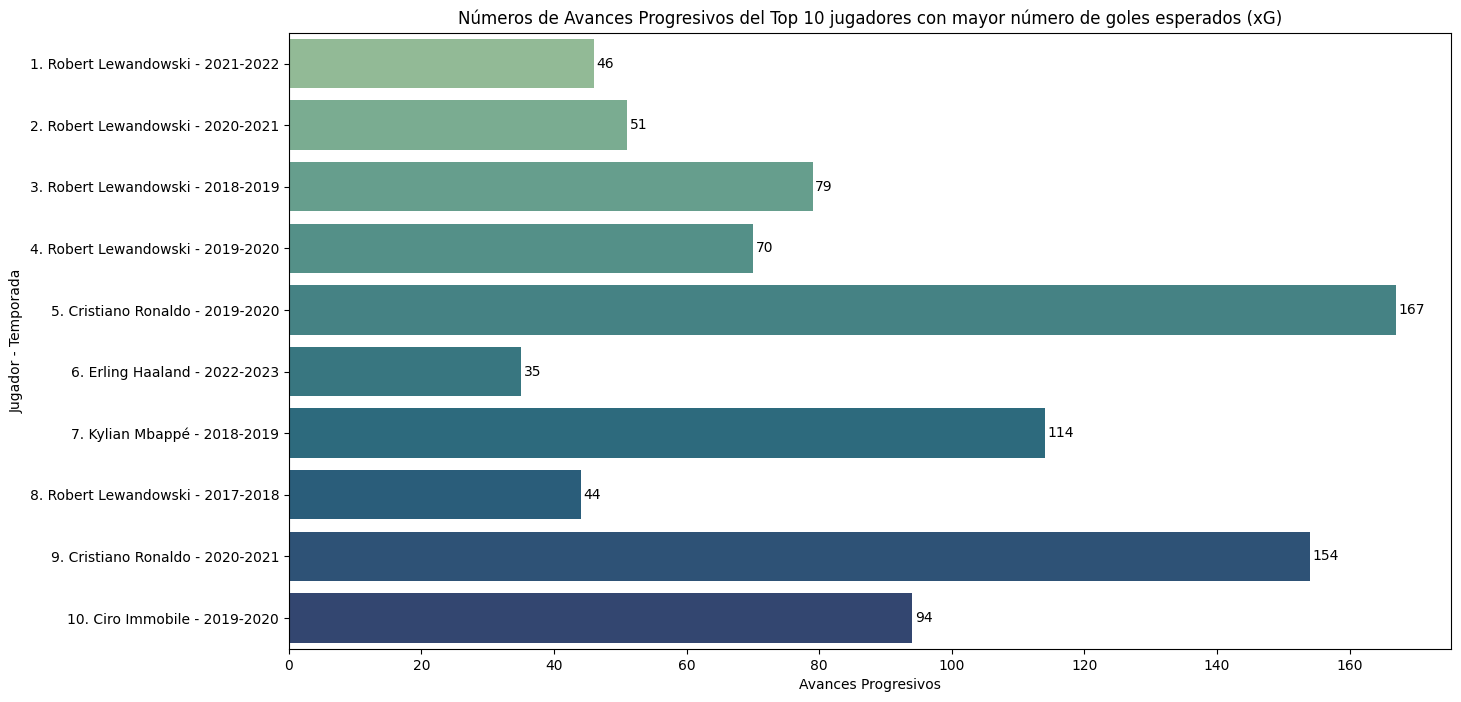

In [13]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='progressive_carries', y='player-season', hue='player-season', data=top_10_players, palette='crest', dodge=False)

for bar in ax.patches:
    width = bar.get_width()
    ax.text(width + 0.4, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='left', va='center')

plt.xlabel('Avances Progresivos')
plt.ylabel('Jugador - Temporada')
plt.title('Números de Avances Progresivos del Top 10 jugadores con mayor número de goles esperados (xG)')
plt.show()

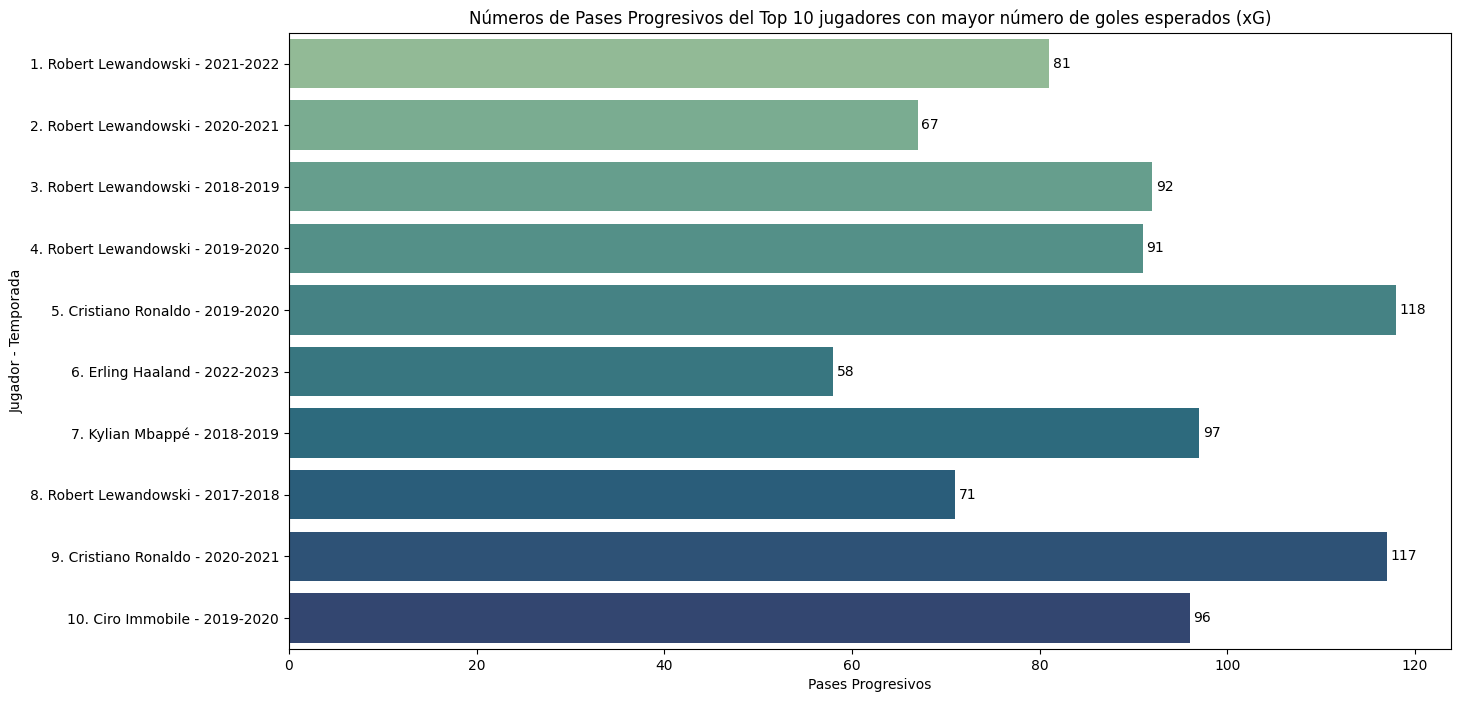

In [14]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='progressive_passes', y='player-season', hue='player-season', data=top_10_players, palette='crest', dodge=False)

for bar in ax.patches:
    width = bar.get_width()
    ax.text(width + 0.4, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='left', va='center')

plt.xlabel('Pases Progresivos')
plt.ylabel('Jugador - Temporada')
plt.title('Números de Pases Progresivos del Top 10 jugadores con mayor número de goles esperados (xG)')
plt.show()

 En el caso de los avances progresivos, su relación con los xG podría corresponderse con el número de goles que han provenido de estos. No sería con el porcentaje de efectividad ya que vemos que Cristiano Ronaldo tiene un gran número de avances y pases progresivos, haciendo que la comparación entre esta estadística y sus goles sea baja. Luego tenemos el caso de Haaland, con 36 goles y 35 avances progresivos. Esto podría deberse a que sus goles no han venido de avances si no de remates o lanzamientos de penalti. Esto hace que la relación entre xG y progressive carries no sea tan clara. En general, a la hora de contar con los pases progresivos, no todo pase dado en los últimos 10 metros de campo tiene que acabar en gol ya que una parte importante de ellos no depende del jugador al ser más probable en ese caso realizar una asistencia. La relación real entre todas estas estadísticas la veranos a la hora de ver la correlación de los datos. También es curioso el caso de estos números son de las últimas 6 temporadas solamente. Veamos por qué realizando la media de los xG por temporada.

In [15]:
players.groupby('season')['xg'].mean()

season
2015-2016    0.000000
2016-2017    0.000000
2017-2018    1.805425
2018-2019    1.925489
2019-2020    1.778843
2020-2021    1.766513
2021-2022    1.689829
2022-2023    1.781029
2023-2024    1.105680
Name: xg, dtype: float64

La media de las temporadas 2015/2016 y 2016/2017 es 0, lo que implica que no hay registros de Expected Goals en la página para esos años. También vemos como la media de la temporada actual es más baja, ya que aún no ha terminado.

Además de todo esto, vamos a volver a ver el `.tail()` del DataFrame, ya que si nos fijamos bien, existe un caso a destacar.

In [16]:
players.tail()

,player,season,team,games,games_starts,minutes,minutes_90s,goals,assists,goals_assists,...,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90
23705,Nadir Zortea,2023-2024,Atalanta,5,0,149,1.7,1,0,1,...,0.60,0.00,0.60,0.60,0.60,0.05,0.16,0.21,0.05,0.21
23706,Szymon Żurkowski,2023-2024,Empoli,4,3,284,3.2,4,0,4,...,1.27,0.00,1.27,1.27,1.27,0.17,0.02,0.18,0.17,0.18
23707,Milan Đurić,2023-2024,Hellas Verona,20,13,1204,13.4,5,1,6,...,0.37,0.07,0.45,0.30,0.37,0.34,0.09,0.43,0.16,0.25
23708,Milan Đurić,2023-2024,Monza,2,1,124,1.4,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
23709,Mateusz Łęgowski,2023-2024,Salernitana,20,9,879,9.8,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.04,0.02,0.04


Podemos observar un mismo jugador en una misma temporada con datos en dos clubes distintos. Tenemos datos para un mismo jugador en distintas temporadas pero también existe el caso de que ese jugador haya cambiado de equipo en el mercado de fichajes de invierno, haciendo que sus datos estén divididos. Veamos cuantos datos pertenecen a este mismo caso:

In [17]:
unique = []
repeated = []

for index, row in players.iterrows():
    player = row['player']
    season = row['season']
    element = (player, season)
    if element in unique:
        repeated.append(element)
    else:
        unique.append(element)

print("Valores repetidos en el dataset:", len(repeated))

Valores repetidos en el dataset: 1138


In [18]:
repeated_df = pd.DataFrame(repeated, columns=['player', 'season'])
repeated_df.tail(10)

,player,season
1128,Roberto Piccoli,2023-2024
1129,Demba Seck,2023-2024
1130,Filippo Terracciano,2023-2024
1131,Vitinha,2023-2024
1132,Mateusz Wieteska,2023-2024
1133,Alessandro Zanoli,2023-2024
1134,Duván Zapata,2023-2024
1135,Alessio Zerbin,2023-2024
1136,Nadir Zortea,2023-2024
1137,Milan Đurić,2023-2024


Aquí podemos ver algunos de los jugadores que han cambiado de club en el presente mercado de invierno al aparecer dos veces en esta temporada. ¿Qué hacemos con estos datos? Podríamos juntarlos pero ocurren tres problemas, y veamoslo con un ejemplo:

In [19]:
repeated_df[repeated_df['player'] == 'Vitinha']

,player,season
418,Vitinha,2022-2023
440,Vitinha,2023-2024
1131,Vitinha,2023-2024


In [20]:
players[players['player'] == 'Vitinha']

,player,season,team,games,games_starts,minutes,minutes_90s,goals,assists,goals_assists,...,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90
13020,Vitinha,2022-2023,Marseille,14,5,464,5.2,2,0,2,...,0.39,0.00,0.39,0.39,0.39,0.77,0.03,0.80,0.77,0.80
13021,Vitinha,2022-2023,Paris S-G,36,29,2446,27.2,2,3,5,...,0.07,0.11,0.18,0.07,0.18,0.11,0.11,0.22,0.11,0.22
13529,Vitinha,2023-2024,Marseille,18,10,923,10.3,3,2,5,...,0.29,0.20,0.49,0.29,0.49,0.50,0.28,0.78,0.50,0.78
13530,Vitinha,2023-2024,Paris S-G,19,15,1377,15.3,5,2,7,...,0.33,0.13,0.46,0.33,0.46,0.14,0.15,0.29,0.14,0.29
16704,Vitinha,2020-2021,Wolves,19,5,520,5.8,0,1,1,...,0.00,0.17,0.17,0.00,0.17,0.09,0.11,0.20,0.09,0.20
23675,Vitinha,2023-2024,Genoa,1,0,14,0.2,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.65,0.00,0.65,0.65,0.65


Si después de haber filtrado qué jugadores tienen varias entradas para una temporada y tenemos para una temporada aún dos jugadores con el mismo nombre, después de comprobar su trayectoria podemos comprobar que son dos jugadores distintos. Si fuésemos a juntar todas las entradas con mismo nombre y mismo temporada nos encontramos con dos problemas:

- Jugadores con el mismo nombre, siendo este el único valor que diferencia a un jugador junto con la temporada.

- Al cambiar de equipo un jugador, su rol también cambia, haciendo que las oportunidades de lanzamiento a puerta cambien también además de los xG. Por lo tanto, sumar ambos valor de xG sería impreciso.

Después de analizar estos datos, veamos la información que nos aporta `.describe()`

In [21]:
players.describe()

,games,games_starts,minutes,minutes_90s,goals,assists,goals_assists,goals_pens,pens_made,pens_att,...,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90
count,23710.000000,23710.000000,23710.000000,23710.000000,23710.000000,23710.000000,23710.000000,23710.000000,23710.000000,23710.000000,...,23710.000000,23710.000000,23710.000000,23710.000000,23710.000000,23710.000000,23710.000000,23710.000000,23710.000000,23710.000000
mean,18.143863,13.863475,1244.731379,13.830316,1.698482,1.180219,2.878701,1.540827,0.157655,0.201392,...,0.114005,0.084202,0.198227,0.105663,0.189871,0.102936,0.069567,0.172514,0.096103,0.165689
std,11.323856,11.209328,969.779586,10.775287,3.287864,1.957873,4.665690,2.903265,0.713289,0.842464,...,0.402762,0.326200,0.529078,0.396748,0.523408,0.366352,0.194873,0.431403,0.361064,0.425668
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,3.000000,339.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,12.000000,1108.000000,12.300000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.080000,0.000000,0.080000,0.030000,0.020000,0.080000,0.030000,0.080000
75%,28.000000,23.000000,2009.000000,22.300000,2.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.150000,0.110000,0.280000,0.130000,0.270000,0.120000,0.100000,0.250000,0.120000,0.240000
max,38.000000,38.000000,3420.000000,38.000000,41.000000,21.000000,57.000000,37.000000,14.000000,15.000000,...,45.000000,18.000000,45.000000,45.000000,45.000000,42.660000,10.060000,42.660000,42.660000,42.660000


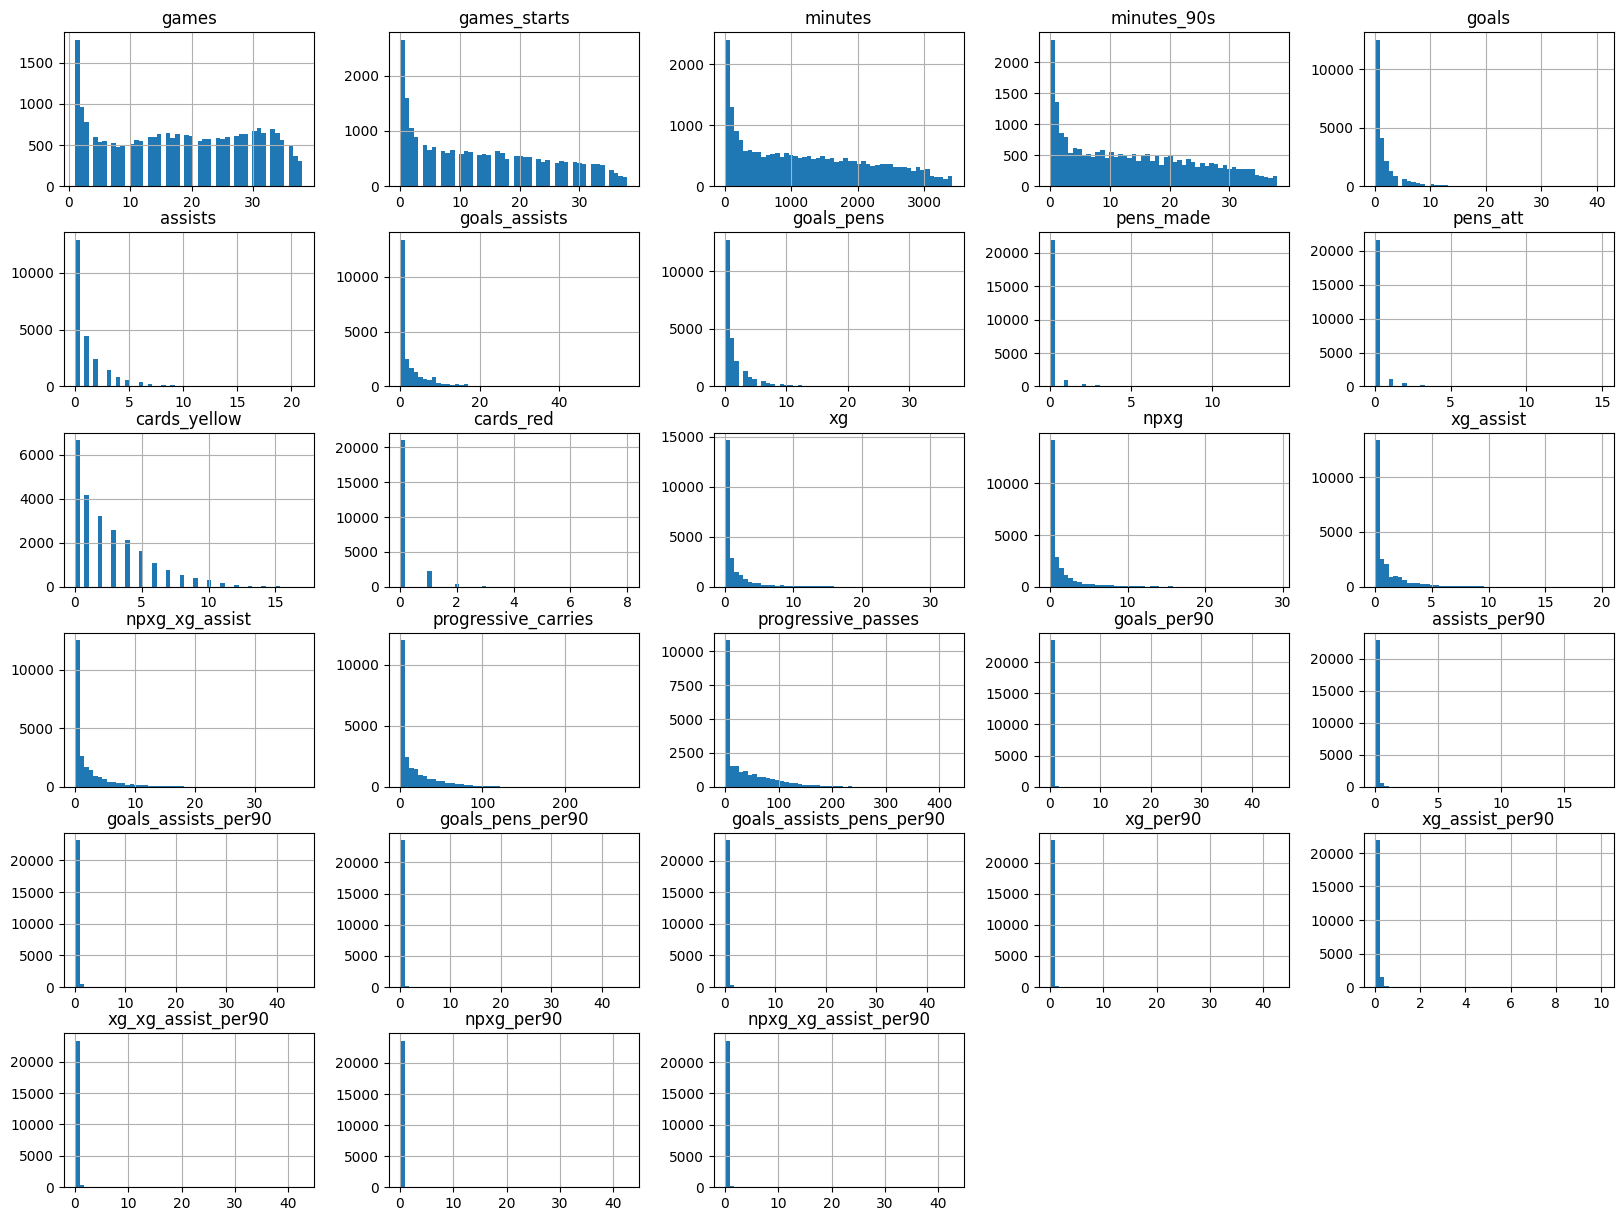

In [22]:
players.hist(bins=50, figsize=(20, 15))
plt.show()

Después de la descripción de los datos y la muestra de los histogramas podemos observar varias cosas:

- Todos los histogramas tienen colas alargadas hacia la izquierda, lo que implica un gran número de valores bajos, siendo pocos los jugadores que despuntan.

- En las estadísticas orientadas a 90 minutos hay muchos valores a 0 o cerca. Esto se debe a que los valores comprenden números entre 0 y 2 o 3 como mucho.

- En las estadísticas avanzadas (expected) tenemos el mismo problema que en las estadísticas orientadas a 90 minutos ya que comprenden únicamente valores entre 0 y 1.

## Correlación entre los Datos

### Correlaciones con Todos los Datos

In [23]:
corr = players.corr()
corr

<ipython-input-23-277a3d2e79de>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = players.corr()


,games,games_starts,minutes,minutes_90s,goals,assists,goals_assists,goals_pens,pens_made,pens_att,...,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90
games,1.000000,0.920590,0.935522,0.935531,0.445874,0.495337,0.522062,0.451317,0.218255,0.233113,...,0.071405,0.031262,0.073672,0.060716,0.065508,0.013241,0.016941,0.018942,0.003604,0.010854
games_starts,0.920590,1.000000,0.995269,0.995264,0.402000,0.460770,0.476639,0.401546,0.218602,0.231430,...,0.026812,0.004591,0.023263,0.017234,0.015899,-0.028880,-0.021626,-0.034206,-0.037000,-0.041219
minutes,0.935522,0.995269,1.000000,0.999997,0.399455,0.456504,0.473056,0.399283,0.216085,0.229124,...,0.028110,0.004461,0.024171,0.018641,0.016889,-0.027739,-0.022053,-0.033431,-0.035837,-0.040426
minutes_90s,0.935531,0.995264,0.999997,1.000000,0.399447,0.456497,0.473047,0.399279,0.216064,0.229094,...,0.028082,0.004493,0.024169,0.018613,0.016888,-0.027759,-0.022027,-0.033437,-0.035857,-0.040431
goals,0.445874,0.402000,0.399455,0.399447,1.000000,0.553449,0.936935,0.981098,0.616127,0.636815,...,0.329496,0.094855,0.309347,0.291596,0.280083,0.192533,0.101297,0.209233,0.160771,0.182734
assists,0.495337,0.460770,0.456504,0.456497,0.553449,1.000000,0.809642,0.550371,0.310941,0.328064,...,0.139714,0.256257,0.264396,0.122057,0.252204,0.081009,0.187317,0.153413,0.065879,0.141674
goals_assists,0.522062,0.476639,0.473056,0.473047,0.936935,0.809642,1.000000,0.922323,0.564659,0.586424,...,0.290821,0.174377,0.328942,0.256704,0.303205,0.169670,0.149987,0.211821,0.140939,0.188222
goals_pens,0.451317,0.401546,0.399283,0.399279,0.981098,0.550371,0.922323,1.000000,0.452061,0.483992,...,0.328561,0.094821,0.308610,0.304018,0.289489,0.185105,0.098660,0.201721,0.163531,0.183874
pens_made,0.218255,0.218602,0.216085,0.216064,0.616127,0.310941,0.564659,0.452061,1.000000,0.965396,...,0.181463,0.051285,0.169796,0.106663,0.112736,0.134046,0.065351,0.143393,0.075452,0.093889
pens_att,0.233113,0.231430,0.229124,0.229094,0.636815,0.328064,0.586424,0.483992,0.965396,1.000000,...,0.186651,0.053971,0.175388,0.115513,0.121107,0.141727,0.067863,0.151026,0.080281,0.099123


In [24]:
corr['xg'].sort_values(ascending=False)

xg                          1.000000
npxg                        0.980614
npxg_xg_assist              0.930104
goals                       0.768230
goals_assists               0.738478
goals_pens                  0.735382
xg_assist                   0.662501
pens_att                    0.571785
progressive_carries         0.570685
pens_made                   0.547923
assists                     0.469731
games                       0.406053
progressive_passes          0.387461
games_starts                0.351139
minutes                     0.349593
minutes_90s                 0.349580
xg_xg_assist_per90          0.318785
npxg_xg_assist_per90        0.285659
xg_per90                    0.283358
npxg_per90                  0.243328
goals_per90                 0.242654
goals_assists_per90         0.234341
goals_pens_per90            0.207646
goals_assists_pens_per90    0.207466
cards_yellow                0.174997
xg_assist_per90             0.173078
assists_per90               0.080430
c

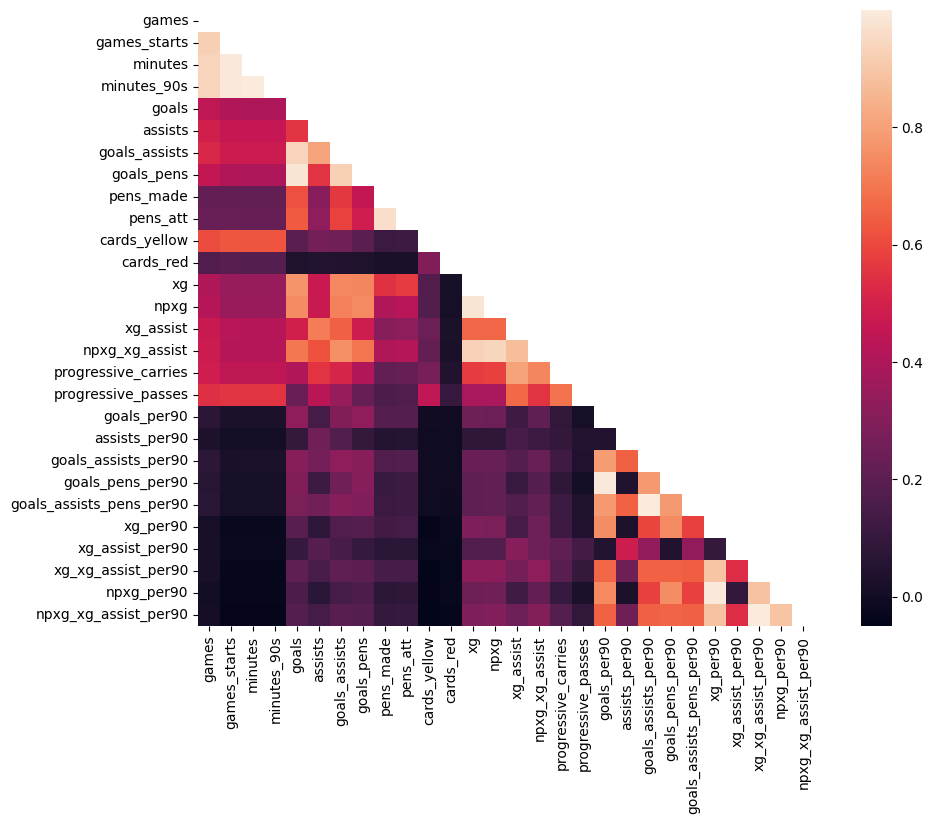

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, fmt='.2f', square=True)
plt.show()

Vemos que las estadísticas avanzadas tienen mucha correlación con los xG ya que dependen de ellos. Como no las vamos a necesitar, vamos a comprobar la correlación de los datos sin ellas.

### Correlaciones sin Estadística Avanzada

In [26]:
players_wo_x = players[["player", "season", "team", "goals", "goals_pens", "goals_assists", "pens_att", "pens_made", "assists", "progressive_carries", "games", "games_starts", "minutes", "minutes_90s", "progressive_passes", "goals_assists_per90", "goals_per90", "cards_yellow", "goals_assists_pens_per90", "goals_pens_per90", "assists_per90", "cards_red", "xg"]]
players_wo_x

,player,season,team,goals,goals_pens,goals_assists,pens_att,pens_made,assists,progressive_carries,...,minutes_90s,progressive_passes,goals_assists_per90,goals_per90,cards_yellow,goals_assists_pens_per90,goals_pens_per90,assists_per90,cards_red,xg
0,David Abraham,2015-2016,Eint Frankfurt,0,0,0,0,0,0,0,...,28.3,0,0.00,0.00,8,0.00,0.00,0.00,0,0.0
1,René Adler,2015-2016,Hamburger SV,0,0,1,0,0,1,0,...,23.0,0,0.04,0.00,3,0.04,0.00,0.04,1,0.0
2,Stefan Aigner,2015-2016,Eint Frankfurt,3,3,6,0,0,3,0,...,26.6,0,0.23,0.11,7,0.23,0.11,0.11,0,0.0
3,Albian Ajeti,2015-2016,Augsburg,0,0,0,0,0,0,0,...,0.4,0,0.00,0.00,0,0.00,0.00,0.00,0,0.0
4,David Alaba,2015-2016,Bayern Munich,2,2,2,0,0,0,0,...,27.7,0,0.07,0.07,2,0.07,0.07,0.00,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23705,Nadir Zortea,2023-2024,Atalanta,1,1,1,0,0,0,7,...,1.7,10,0.60,0.60,1,0.60,0.60,0.00,0,0.1
23706,Szymon Żurkowski,2023-2024,Empoli,4,4,4,0,0,0,9,...,3.2,10,1.27,1.27,1,1.27,1.27,0.00,0,0.5
23707,Milan Đurić,2023-2024,Hellas Verona,5,4,6,3,1,1,3,...,13.4,15,0.45,0.37,2,0.37,0.30,0.07,0,4.5
23708,Milan Đurić,2023-2024,Monza,0,0,0,0,0,0,0,...,1.4,1,0.00,0.00,0,0.00,0.00,0.00,0,0.0


In [27]:
corr = players_wo_x.corr()
corr

<ipython-input-27-fc32fd0ddd6c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = players_wo_x.corr()


,goals,goals_pens,goals_assists,pens_att,pens_made,assists,progressive_carries,games,games_starts,minutes,minutes_90s,progressive_passes,goals_assists_per90,goals_per90,cards_yellow,goals_assists_pens_per90,goals_pens_per90,assists_per90,cards_red,xg
goals,1.000000,0.981098,0.936935,0.636815,0.616127,0.553449,0.402541,0.445874,0.402000,0.399455,0.399447,0.237213,0.309347,0.329496,0.198977,0.280083,0.291596,0.094855,0.035882,0.768230
goals_pens,0.981098,1.000000,0.922323,0.483992,0.452061,0.550371,0.402921,0.451317,0.401546,0.399283,0.399279,0.228811,0.308610,0.328561,0.197821,0.289489,0.304018,0.094821,0.035626,0.735382
goals_assists,0.936935,0.922323,1.000000,0.586424,0.564659,0.809642,0.515052,0.522062,0.476639,0.473056,0.473047,0.347649,0.328942,0.290821,0.251014,0.303205,0.256704,0.174377,0.044549,0.738478
pens_att,0.636815,0.483992,0.586424,1.000000,0.965396,0.328064,0.227331,0.233113,0.231430,0.229124,0.229094,0.167697,0.175388,0.186651,0.120049,0.121107,0.115513,0.053971,0.021321,0.571785
pens_made,0.616127,0.452061,0.564659,0.965396,1.000000,0.310941,0.215496,0.218255,0.218602,0.216085,0.216064,0.162101,0.169796,0.181463,0.111990,0.112736,0.106663,0.051285,0.020386,0.547923
assists,0.553449,0.550371,0.809642,0.328064,0.310941,1.000000,0.551402,0.495337,0.460770,0.456504,0.456497,0.430110,0.264396,0.139714,0.264034,0.252204,0.122057,0.256257,0.045906,0.469731
progressive_carries,0.402541,0.402921,0.515052,0.227331,0.215496,0.551402,1.000000,0.485366,0.444934,0.443012,0.442996,0.689643,0.124863,0.089078,0.268624,0.116564,0.077755,0.092555,0.043844,0.570685
games,0.445874,0.451317,0.522062,0.233113,0.218255,0.495337,0.485366,1.000000,0.920590,0.935522,0.935531,0.541614,0.073672,0.071405,0.609855,0.065508,0.060716,0.031262,0.170323,0.406053
games_starts,0.402000,0.401546,0.476639,0.231430,0.218602,0.460770,0.444934,0.920590,1.000000,0.995269,0.995264,0.553840,0.023263,0.026812,0.627752,0.015899,0.017234,0.004591,0.190493,0.351139
minutes,0.399455,0.399283,0.473056,0.229124,0.216085,0.456504,0.443012,0.935522,0.995269,1.000000,0.999997,0.550478,0.024171,0.028110,0.626159,0.016889,0.018641,0.004461,0.183566,0.349593


In [28]:
corr['xg'].sort_values(ascending=False)

xg                          1.000000
goals                       0.768230
goals_assists               0.738478
goals_pens                  0.735382
pens_att                    0.571785
progressive_carries         0.570685
pens_made                   0.547923
assists                     0.469731
games                       0.406053
progressive_passes          0.387461
games_starts                0.351139
minutes                     0.349593
minutes_90s                 0.349580
goals_per90                 0.242654
goals_assists_per90         0.234341
goals_pens_per90            0.207646
goals_assists_pens_per90    0.207466
cards_yellow                0.174997
assists_per90               0.080430
cards_red                   0.016007
Name: xg, dtype: float64

Tomando esta correlación vamos a quedarnos con los 8 primeras columnas:

- `goals`: Los goles que acaba metiendo realmente el jugador.

- `goals_assists`: La suma de goles y asistencias.

- `goals_pens`: Los goles anotados que no han sido de penalti.

- `pens_att`: Los lanzamientos de penalti que ha realizado el jugador.

- `progressive_carries`: Los avances progresivos en los últimos 10 metros de campo que pueden acabar en gol.

- `pens_made`: Los lanzamientos de penalti anotados.

- `assists`: Las asistencias que ha realizado el jugador.

- `games`: Partidos que ha jugado el jugador en la temporada. Mientras más partidos juegue más ocasiones de gol puede generar.

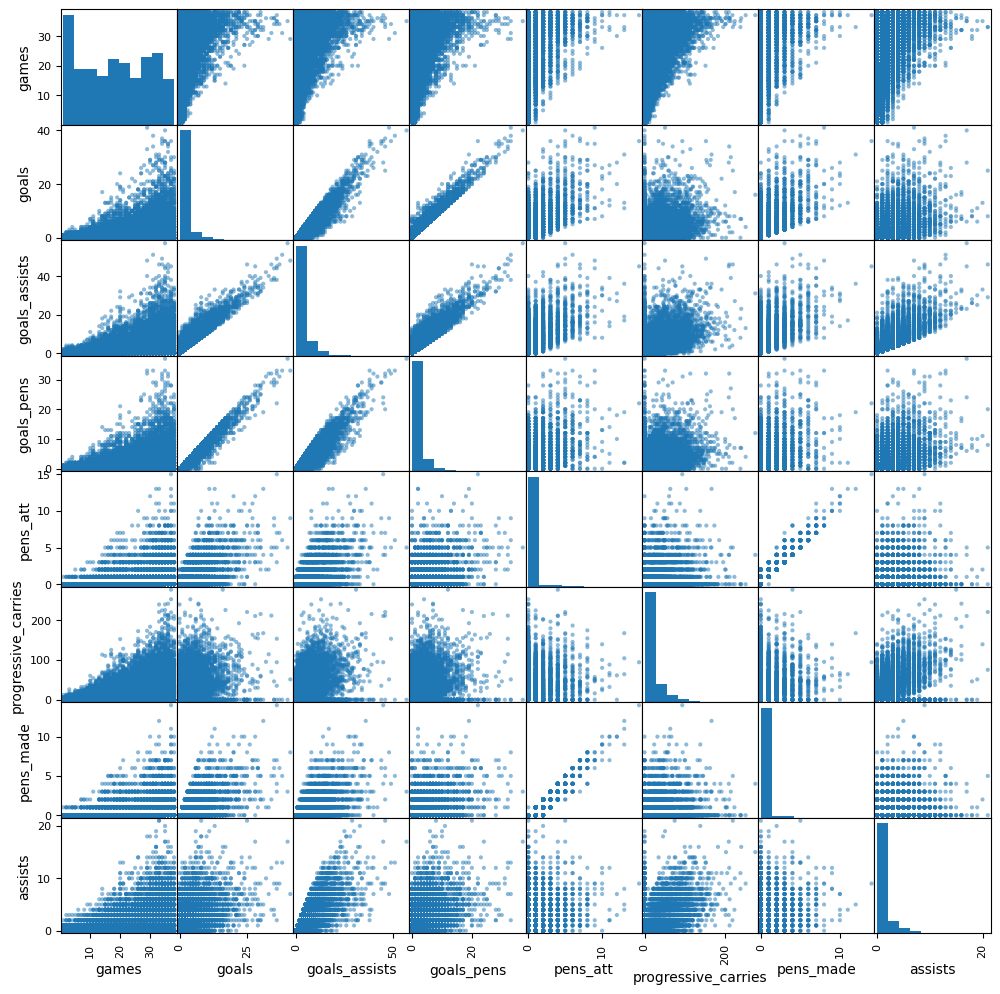

In [29]:
from pandas.plotting import scatter_matrix

attributes = ["games", "goals", "goals_assists", "goals_pens", "pens_att", "progressive_carries", "pens_made", "assists"]
scatter_matrix(players[attributes], figsize=(12,12))
plt.show()

Pese a haber cierta dispersión en los datos, podemos ver como se pueden apreciar líneas rectas que marcan la correlación.

## Limpieza de los Datos

Después de haber realizado un estudio de los datos vamos a quedarnos con los que nos han resultado realmente relevantes para el posterior entrenamiento:

### Cambios Realizados durante el Scrapping

- Cambio del formato de los minutos.

![](https://drive.google.com/uc?export=view&id=10hMJ5tiDl-Di8_63ggLVqJLGNxoaTlMI)

<br>

- Transformación de datos de `object` a `float` o `int` respectivamente.

![](https://drive.google.com/uc?export=view&id=1BN0fRqw_6yoek7w0bqdvH40wXl3wsm4g)

<br>

- Gestión de nulos: Pasamos los datos que nos llegan nulos a 0.

![](https://drive.google.com/uc?export=view&id=1q_HtT27ifws22nuHxE7jJeawWdFLsFJu)

### Preparación de PySpark para Trabajar los Datos

Para esta limpieza de datos vamos a usar PySpark. PySpark es una biblioteca de código abierto para análisis de datos distribuidos en el framework Apache Spark. Permite el procesamiento de grandes conjuntos de datos de manera distribuida en clústeres, utilizando el lenguaje de programación Python. PySpark facilita tareas como la manipulación, transformación y análisis de datos a gran escala, aprovechando la capacidad de procesamiento paralelo de Spark.

In [30]:
# Instalación de las librerías necesarias para utilizar PySpark
!pip install -q findspark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=fcba328a584345d26a72a8535fad5a975aad816bbabd266562586e0f27a946af
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [31]:
# Importamos e inicializamos findspark para usar Spark en python sin tener que
# configurar manualmente las variables de entorno.
import findspark
findspark.init()

# Importamos PySpark y sus funciones SQL.
import pyspark
from pyspark.sql import functions as f

In [32]:
# Inicializamos la sesión de PySpark para configurar el entorno de trabajo para
# el procesamiento distribuido de datos y permitir la carga de datos, la optimización
# de consultas y la interacción de clusteres con Spark.
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('ExpectedFoot')\
        .getOrCreate()

In [33]:
# Creamos un DataFrame de PySpark en base al DataFrame de Pandas que ya tenemos.
players_spark = spark.createDataFrame(players)
players_spark

DataFrame[player: string, season: string, team: string, games: bigint, games_starts: bigint, minutes: bigint, minutes_90s: double, goals: bigint, assists: bigint, goals_assists: bigint, goals_pens: bigint, pens_made: bigint, pens_att: bigint, cards_yellow: bigint, cards_red: bigint, xg: double, npxg: double, xg_assist: double, npxg_xg_assist: double, progressive_carries: bigint, progressive_passes: bigint, goals_per90: double, assists_per90: double, goals_assists_per90: double, goals_pens_per90: double, goals_assists_pens_per90: double, xg_per90: double, xg_assist_per90: double, xg_xg_assist_per90: double, npxg_per90: double, npxg_xg_assist_per90: double]

In [34]:
# Mostramos las primeras 5 filas.
players_spark.show(5)

+-------------+---------+--------------+-----+------------+-------+-----------+-----+-------+-------------+----------+---------+--------+------------+---------+---+----+---------+--------------+-------------------+------------------+-----------+-------------+-------------------+----------------+------------------------+--------+---------------+------------------+----------+--------------------+
|       player|   season|          team|games|games_starts|minutes|minutes_90s|goals|assists|goals_assists|goals_pens|pens_made|pens_att|cards_yellow|cards_red| xg|npxg|xg_assist|npxg_xg_assist|progressive_carries|progressive_passes|goals_per90|assists_per90|goals_assists_per90|goals_pens_per90|goals_assists_pens_per90|xg_per90|xg_assist_per90|xg_xg_assist_per90|npxg_per90|npxg_xg_assist_per90|
+-------------+---------+--------------+-----+------------+-------+-----------+-----+-------+-------------+----------+---------+--------+------------+---------+---+----+---------+--------------+----------

Ahora que ya tenemos los datos listos para trabajarlos con PySpark, vamos a proceder a hacer las transformaciones necesarias:

### Eliminación de los Datos de las Temporadas 2015/2016 y 2016/2017

Las temporadas 2015/2016 y 2016/2017 no tienen datos sobre xG, por lo que suprimiremos todos los datos referentes a esas temporadas. Haremos lo siguiente:

In [35]:
# Importamos la función 'col' para acceder a una columna específica del DataFrame
from pyspark.sql.functions import col

# Definimos en un array las temporadas que queremos eliminar
season_to_delete = ["2015-2016", "2016-2017"]

# Filtramos en el DataFrame aquellas temporadas que no corresponde al del array
# que acabamos de definir de la siguiente manera:
# - La virgulilla (~) indica lo contrario a lo que está buscando.
players_spark = players_spark.filter(~col("season").isin(season_to_delete))

# Mostramos el DataFrame. Si todo ha ido bien la primera entrada corresponderá
# a la temporada 2017/2018
players_spark.show()

+------------------+---------+--------------+-----+------------+-------+-----------+-----+-------+-------------+----------+---------+--------+------------+---------+----+----+---------+--------------+-------------------+------------------+-----------+-------------+-------------------+----------------+------------------------+--------+---------------+------------------+----------+--------------------+
|            player|   season|          team|games|games_starts|minutes|minutes_90s|goals|assists|goals_assists|goals_pens|pens_made|pens_att|cards_yellow|cards_red|  xg|npxg|xg_assist|npxg_xg_assist|progressive_carries|progressive_passes|goals_per90|assists_per90|goals_assists_per90|goals_pens_per90|goals_assists_pens_per90|xg_per90|xg_assist_per90|xg_xg_assist_per90|npxg_per90|npxg_xg_assist_per90|
+------------------+---------+--------------+-----+------------+-------+-----------+-----+-------+-------------+----------+---------+--------+------------+---------+----+----+---------+-------

In [36]:
# Mostramos el número de entradas que tenemos ahora mismo.
players_spark.count()

18209

### Eliminación de Columnas no Necesarias

Ahora nos quedaremos solamente con las columnas que más correlación guardaban y que elegimos anteriormente: `goals`, `goals_assists`, `goals_pens`, `pens_att`,  `progressive_carries`, `pens_made`, `assists` y `games`. El resto de columnas las eliminaremos.

In [37]:
# Usaremos el array de atributos que definimos antes para observar las correlaciones
# en una gráfica añadiéndolo el atributo de 'xG'.
attributes.append('xg')
attributes

['games',
 'goals',
 'goals_assists',
 'goals_pens',
 'pens_att',
 'progressive_carries',
 'pens_made',
 'assists',
 'xg']

In [38]:
# Con la función '.select()' nos quedaremos solo con las columnas deseadas.
players_spark = players_spark.select(attributes)
players_spark.show()

+-----+-----+-------------+----------+--------+-------------------+---------+-------+----+
|games|goals|goals_assists|goals_pens|pens_att|progressive_carries|pens_made|assists|  xg|
+-----+-----+-------------+----------+--------+-------------------+---------+-------+----+
|   27|    0|            2|         0|       0|                 17|        0|      2| 0.4|
|   12|    0|            0|         0|       0|                  8|        0|      0| 0.2|
|   14|    0|            0|         0|       0|                  0|        0|      0| 0.0|
|    5|    0|            0|         0|       0|                  2|        0|      0| 0.0|
|   11|    0|            0|         0|       0|                 15|        0|      0| 0.2|
|   22|    5|            5|         5|       1|                 27|        0|      0| 4.7|
|   22|    0|            1|         0|       0|                 23|        0|      1| 0.2|
|   23|    2|            4|         2|       0|                 53|        0|      2| 1.3|

### Convirtiendo el DataFrame de PySpark a Pandas

Ahora que ya hemos hecho la transformación de los datos con PySpark, convertiremos los datos de nuevo a Pandas para realizar el entrenamiento del modelo.

In [39]:
players = players_spark.toPandas()
players

,games,goals,goals_assists,goals_pens,pens_att,progressive_carries,pens_made,assists,xg
0,27,0,2,0,0,17,0,2,0.4
1,12,0,0,0,0,8,0,0,0.2
2,14,0,0,0,0,0,0,0,0.0
3,5,0,0,0,0,2,0,0,0.0
4,11,0,0,0,0,15,0,0,0.2
...,...,...,...,...,...,...,...,...,...
18204,5,1,1,1,0,7,0,0,0.1
18205,4,4,4,4,0,9,0,0,0.5
18206,20,5,6,4,3,3,1,1,4.5
18207,2,0,0,0,0,0,0,0,0.0


## Preparación de los Datos para el Entrenamiento

Una vez que tenemos los datos bien preparados. Procederemos a efectuar el entrenamiento. Para ellos tendremos que hacer lo siguiente:

### Mezcla de Datos

Mezclamos todos los datos por si existe algún patrón en el orden de los mismos. Si fuera el caso, el rendimiento del modelo sería menor, ya que opera en base a patrones que no son reales.

In [40]:
players = players.sample(frac=1)
players

,games,goals,goals_assists,goals_pens,pens_att,progressive_carries,pens_made,assists,xg
2368,7,0,0,0,0,0,0,0,0.0
15813,11,0,0,0,0,1,0,0,0.6
793,27,1,2,1,0,30,0,1,1.1
9787,15,1,1,1,0,12,0,0,3.1
12102,28,7,8,0,9,16,7,1,7.3
...,...,...,...,...,...,...,...,...,...
11702,28,4,5,4,0,37,0,1,1.8
13627,17,0,1,0,0,6,0,1,0.1
2100,1,0,0,0,0,0,0,0,0.0
14508,9,1,1,1,0,4,0,0,2.1


### Separación de la matriz de características  X  de los datos de salida  y  (el target)

Ahora separamos la columna `xg` del resto de datos. Esta será el *target*, el objetivo a predecir. Los dejaremos divididos en dos variables:

- `y` -> El target, datos de salida. Cada valor corresponde a la misma fila en la matriz de características.

- `X` -> Matriz de características. Todos aquellos datos necesarios para predecir el valor.

In [41]:
y = players["xg"]

In [42]:
y

2368     0.0
15813    0.6
793      1.1
9787     3.1
12102    7.3
        ... 
11702    1.8
13627    0.1
2100     0.0
14508    2.1
14111    0.5
Name: xg, Length: 18209, dtype: float64

In [43]:
# Eliminamos 'xG' del array de columnas para obtener la matriz de características.
attributes = attributes[:-1]

X = players[attributes]

In [44]:
X

,games,goals,goals_assists,goals_pens,pens_att,progressive_carries,pens_made,assists
2368,7,0,0,0,0,0,0,0
15813,11,0,0,0,0,1,0,0
793,27,1,2,1,0,30,0,1
9787,15,1,1,1,0,12,0,0
12102,28,7,8,0,9,16,7,1
...,...,...,...,...,...,...,...,...
11702,28,4,5,4,0,37,0,1
13627,17,0,1,0,0,6,0,1
2100,1,0,0,0,0,0,0,0
14508,9,1,1,1,0,4,0,0


### Creación de los Datos de Entrenamiento y de Prueba

Ahora dividiremos los datos en datos de entrenamiento y datos de prueba. Para el
entrenamiento solo usaremos un 80% de los datos. El porcentaje restante será utilizado para hacer pruebas de rendimiento del modelo. El porcentaje de datos que usemos es determinante también para este rendimiento.

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
# Matriz de Características de Entrenamiento
X_train

,games,goals,goals_assists,goals_pens,pens_att,progressive_carries,pens_made,assists
15983,21,0,1,0,0,26,0,1
12340,1,0,0,0,0,0,0,0
2473,7,0,0,0,0,5,0,0
7770,1,0,0,0,0,0,0,0
11897,12,1,1,1,0,4,0,0
...,...,...,...,...,...,...,...,...
16091,14,1,1,1,0,1,0,0
11930,30,10,11,10,0,14,0,1
2612,8,0,0,0,0,2,0,0
13368,37,0,0,0,0,0,0,0


In [47]:
# Matriz de Características de Prueba
X_test

,games,goals,goals_assists,goals_pens,pens_att,progressive_carries,pens_made,assists
2528,9,0,0,0,0,0,0,0
4532,31,2,8,2,0,48,0,6
18117,17,0,0,0,0,0,0,0
6921,13,3,3,3,0,11,0,0
840,30,10,14,10,0,69,0,4
...,...,...,...,...,...,...,...,...
14809,5,0,0,0,0,1,0,0
17011,7,0,0,0,0,4,0,0
3641,14,2,4,2,0,28,0,2
18186,18,3,3,3,0,64,0,0


In [48]:
# Target de Entrenamiento
y_train

15983    0.7
12340    0.0
2473     0.2
7770     0.0
11897    0.4
        ... 
16091    1.8
11930    8.3
2612     0.1
13368    0.0
2561     0.0
Name: xg, Length: 14567, dtype: float64

In [49]:
# Target de Prueba
y_test

2528     0.1
4532     4.1
18117    0.0
6921     1.5
840      7.4
        ... 
14809    0.0
17011    0.4
3641     1.3
18186    3.1
8130     2.0
Name: xg, Length: 3642, dtype: float64

### Comprobación de Similitud entre Datos de Prueba y Datos de Entrenamiento

Para comprobar que los datos se han separado correctamente mostraremos que la distribución de los datos es igual tanto en los datos de entrenamiento como en los datos de prueba.

#### Comprobación de Similitud del Atributo `goals`

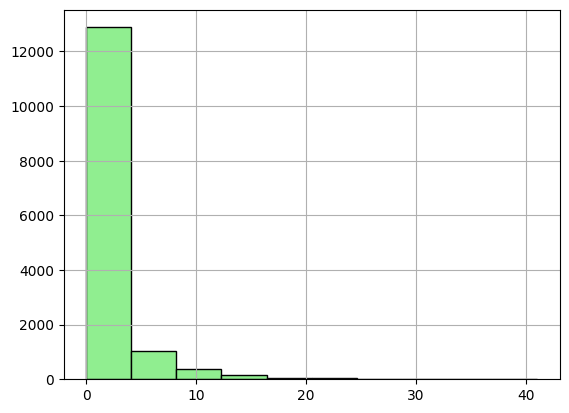

In [50]:
X_train["goals"].hist(color='lightgreen', edgecolor="black")
plt.show()

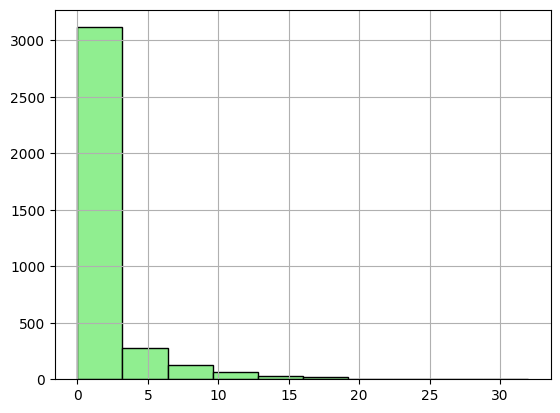

In [51]:
X_test["goals"].hist(color='lightgreen', edgecolor="black")
plt.show()

#### Comprobación de Similitud del Atributo `assists`

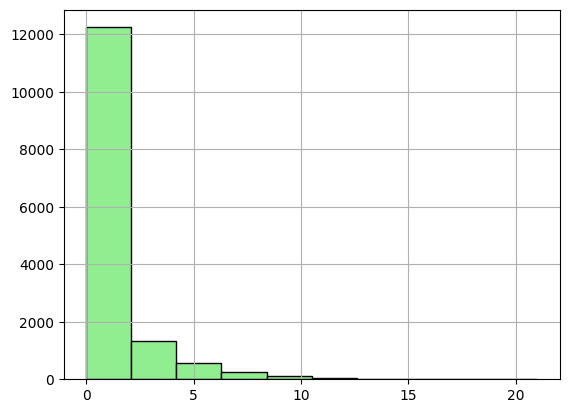

In [52]:
X_train["assists"].hist(color='lightgreen', edgecolor="black")
plt.show()

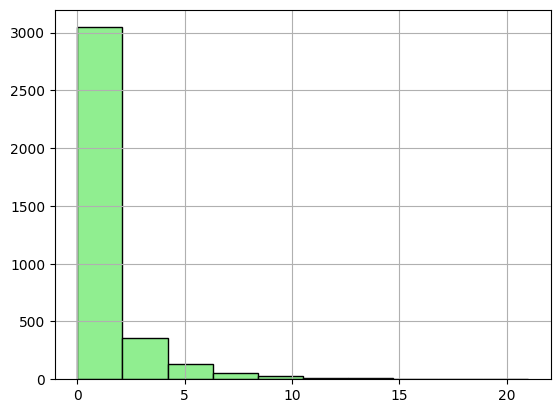

In [53]:
X_test["assists"].hist(color='lightgreen', edgecolor="black")
plt.show()

Podemos observar como la distribución de ambos atributos es prácticamente igual.

## Entrenamiento del Modelo y Comprobación del Rendimeinto

Llegó la hora de la definición y entrenamiento del modelo. Existen muchos tipos de modelos de aprendizaje de Inteligencia Artificial que según las características nos pueden ofrecer unos resultados y unos rendimientos distintos. Vamos a probar tres modelos y comprobaremos como reaccionan a varias pruebas de rendimiento. Los modelos elegidos son:

- Decision Tree

- Random Forest

- Modelo de Red Neuronal Artificial (ANN) de sklearn

Para evaluar el rendimiento de cada algoritmo usaremos primero los datos de prueba, luego utilizaremos *mean_squared_error* y *r2_score* para obtener la puntuación en base a las predicciones utilizadas anteriormente. También usaremos el dataset de los diez mejores registros de expected goals de todos nuestros datos para ver si cada modelo es capaz de acertarlos además de los datos de prueba anteriores (esto hecho en base a pruebas manuales y en su correspondiente apartado explicaremos por qué).

In [54]:
# Importamos las funciones de sklearn de mean_squared_error y r2_score
# para usarlas en las comprobaciones de rendimiento
from sklearn.metrics import mean_squared_error, r2_score

### Decision Tree

Es un algoritmo que toma decisiones según características de los datos, organizadas como un árbol. Cada nodo decide basado en una característica, y las ramas indican resultados. Se usan para clasificación y regresión al dividir datos en subconjuntos según características clave.

In [55]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()

# Entrenamiento del modelo
dt_model.fit(X_train, y_train)

# Predicción
y_pred = dt_model.predict(X_test)

y_test_list = y_test.tolist()

#### Evaluación del Rendimiento

Primero compararemos los targets reales de prueba con los targets predichos en base a los datos de prueba para ver la efectividad del modelo. Luego evaluaremos las puntuaciones de *mean_squared_error* y *r2_score*. Aplicaremos el mismo proceso para todos los modelos.

In [56]:
results = pd.DataFrame({
    'xG reales': y_test_list,
    'xG estimados': y_pred,
    'Error absoluto': [abs(r - e) for r, e in zip(y_test_list, y_pred)]
})

In [57]:
results.head(20)

,xG reales,xG estimados,Error absoluto
0,0.1,0.070968,0.029032
1,4.1,1.900000,2.200000
2,0.0,0.015789,0.015789
3,1.5,1.000000,0.500000
4,7.4,8.100000,0.700000
5,0.0,0.020690,0.020690
6,2.4,1.266667,1.133333
7,7.8,6.200000,1.600000
8,4.7,8.400000,3.700000
9,0.2,0.028655,0.171345


In [58]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación: 1 es la predicción perfecta.
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  1.3436455492194446
Coeficiente de determinación:  0.7619945402855712


Ahora vamos a comprobar si el modelo es capaz de predecir los expected goals que consiguieron los diez mejores registros de nuestros datos como hemos mencionado previamente y veremos que porcentaje acierta. También lo haremos en cada modelo.

In [59]:
pred = dt_model.predict(top_10_players[attributes])

xg_pred = top_10_players['xg'].to_list()

results = pd.DataFrame({
    'xG reales': pred,
    'xG estimados': xg_pred,
    'Error absoluto': [abs(r - e) for r, e in zip(pred, xg_pred)]
})

results.head(10)

,xG reales,xG estimados,Error absoluto
0,33.2,33.2,0.0
1,31.3,31.3,0.0
2,30.7,30.7,0.0
3,30.7,30.7,0.0
4,28.6,28.6,0.0
5,28.4,28.4,0.0
6,28.0,28.0,0.0
7,27.9,27.9,0.0
8,27.7,27.7,0.0
9,27.2,27.2,0.0


In [60]:
zero_num = [x for x in results['Error absoluto'] if x == 0]

# Calcula el porcentaje de ceros
zero_per = (len(zero_num) / results['Error absoluto'].count()) * 100

print("Porcentaje de acierto:", zero_per, "%")

Porcentaje de acierto: 100.0 %


### Random Forest

Es un algoritmo de aprendizaje supervisado que construye múltiples árboles de decisión y los combina para mejorar la precisión y generalización del modelo, siendo efectivo para clasificación y regresión.

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

# Entrenamiento del modelo
rf_model.fit(X_train, y_train)

# Predicción
y_pred = rf_model.predict(X_test)

y_test_list = y_test.tolist()

#### Evaluación del Rendimiento

In [62]:
# Comprobación en los datos de prueba
results = pd.DataFrame({
    'xG reales': y_test_list,
    'xG estimados': y_pred,
    'Error absoluto': [abs(r - e) for r, e in zip(y_test_list, y_pred)]
})

results.head(20)

,xG reales,xG estimados,Error absoluto
0,0.1,0.070679,0.029321
1,4.1,1.838000,2.262000
2,0.0,0.016055,0.016055
3,1.5,1.361883,0.138117
4,7.4,8.210000,0.810000
5,0.0,0.020018,0.020018
6,2.4,1.138045,1.261955
7,7.8,4.382000,3.418000
8,4.7,7.564000,2.864000
9,0.2,0.028569,0.171431


In [63]:
# Error
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred, squared=False))

# Coeficiente de determinación: 1 es la predicción perfecta.
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  1.011801077609363
Coeficiente de determinación:  0.8650391642086444


In [64]:
# Comprobación de acierto de los diez mejores registros
pred = rf_model.predict(top_10_players[attributes])

xg_pred = top_10_players['xg'].to_list()

results = pd.DataFrame({
    'xG reales': pred,
    'xG estimados': xg_pred,
    'Error absoluto': [abs(r - e) for r, e in zip(pred, xg_pred)]
})

results.head(10)

,xG reales,xG estimados,Error absoluto
0,31.244,33.2,1.956
1,29.454,31.3,1.846
2,25.435,30.7,5.265
3,30.382,30.7,0.318
4,26.856,28.6,1.744
5,28.829,28.4,0.429
6,27.537,28.0,0.463
7,27.223,27.9,0.677
8,26.470,27.7,1.230
9,27.055,27.2,0.145


In [65]:
zero_num = [x for x in results['Error absoluto'] if x == 0]

# Calcula el porcentaje de ceros
zero_per = (len(zero_num) / results['Error absoluto'].count()) * 100

print("Porcentaje de acierto:", zero_per, "%")

Porcentaje de acierto: 0.0 %


### ANN (Artificial Neuronal Networks)

Una red neuronal artifical es un modelo computacional inspirado en el cerebro humano, compuesto por nodos interconectados organizados en capas. Cada nodo procesa información y transmite su resultado a nodos posteriores. Durante el entrenamiento, los pesos de estas conexiones se ajustan para que la red aprenda a mapear correctamente las entradas a las salidas. Este proceso permite a la red aprender patrones complejos y realizar tareas como clasificación, regresión, reconocimiento de patrones, entre otros.

El algoritmo en concreto que vamos a utilizar se llama MLP Regressor, de scikit-learn. Es un modelo de regresión basado en redes neuronales artificiales, donde "MLP" significa Perceptrón Multicapa. Este modelo se utiliza para predecir valores numéricos a partir de datos de entrada. Se ajusta mediante algoritmos de aprendizaje para minimizar la diferencia entre las predicciones y los valores reales.

In [66]:
from sklearn.neural_network import MLPRegressor

# Crear el modelo de Red Neuronal Artificial (MLPRegressor)
nn_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', max_iter=1000, random_state=42)

# Entrenamiento del modelo
nn_model.fit(X_train, y_train)

# Predicción
y_pred_nn = nn_model.predict(X_test)

#### Evaluación del Rendimiento

In [67]:
# Comprobación en los datos de prueba
results = pd.DataFrame({
    'xG reales': y_test_list,
    'xG estimados': y_pred,
    'Error absoluto': [abs(r - e) for r, e in zip(y_test_list, y_pred)]
})

results.head(20)

,xG reales,xG estimados,Error absoluto
0,0.1,0.070679,0.029321
1,4.1,1.838000,2.262000
2,0.0,0.016055,0.016055
3,1.5,1.361883,0.138117
4,7.4,8.210000,0.810000
5,0.0,0.020018,0.020018
6,2.4,1.138045,1.261955
7,7.8,4.382000,3.418000
8,4.7,7.564000,2.864000
9,0.2,0.028569,0.171431


In [68]:
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)
r2_nn = r2_score(y_test, y_pred_nn)

print("Error cuadrático medio (RMSE): ", rmse_nn)
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio (RMSE):  0.9518265580136503
Coeficiente de determinación:  0.8650391642086444


In [69]:
# Comprobación de acierto de los diez mejores registros
pred = nn_model.predict(top_10_players[attributes])

xg_pred = top_10_players['xg'].to_list()

results = pd.DataFrame({
    'xG reales': pred,
    'xG estimados': xg_pred,
    'Error absoluto': [abs(r - e) for r, e in zip(pred, xg_pred)]
})

results.head(10)

,xG reales,xG estimados,Error absoluto
0,27.094563,33.2,6.105437
1,30.981873,31.3,0.318127
2,18.856251,30.7,11.843749
3,26.767675,30.7,3.932325
4,26.285374,28.6,2.314626
5,27.245131,28.4,1.154869
6,25.654306,28.0,2.345694
7,23.187674,27.9,4.712326
8,24.779100,27.7,2.920900
9,27.756427,27.2,0.556427


In [70]:
zero_num = [x for x in results['Error absoluto'] if x == 0]

# Calcula el porcentaje de ceros
zero_per = (len(zero_num) / results['Error absoluto'].count()) * 100

print("Porcentaje de acierto:", zero_per, "%")

Porcentaje de acierto: 0.0 %


## Elección del Modelo y Exportación

Hemos comprobado el rendimiento de todos los modelos y vemos que han obtenido resultados parecidos. Es cierto que el modelo de Decision Tree tiene un poco más de error y un poco menos de coeficiente de determinación, pero ha sido el único capaz de acertar valores de forma exacta. Esto se debe a su funcionamiento interno, en el que decidiendo entre varias características se queda con una concreta. Como ha demostrado ser el que mejor funciona dicidimos quedarnos con ese para exportarlo a la página web.

In [71]:
# Importamos la librería joblib para la exportación del modelo en su posterior
# uso en la página web
import joblib

In [72]:
# Exportamos el modelo comprimiéndolo en un archivo
joblib.dump(dt_model, "xg_prediction_model.pkl")

['xg_prediction_model.pkl']

In [73]:
# Descarga del modelo para su posterior uso
from google.colab import files

files.download('xg_prediction_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>